# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results_l3/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results_l3/896072146_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/900298796_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/489411441_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/1141113940_defl1_passive_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/25936709_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/1053632127_defl3_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace.2.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace.3.json
Using /home/ashinde/PhD/CaffineBravery/results_l3/trace.4.json


In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/896072146_attl0_pol_graph.json
Edge map is:
0:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated)]
1:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated)]
2:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, terminated)]
3:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
4:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated)]
5:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated)]
6:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, terminated)]
7:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
8:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
9:[(AccessPerm, auth), (HostObs, none), (ActionResult,

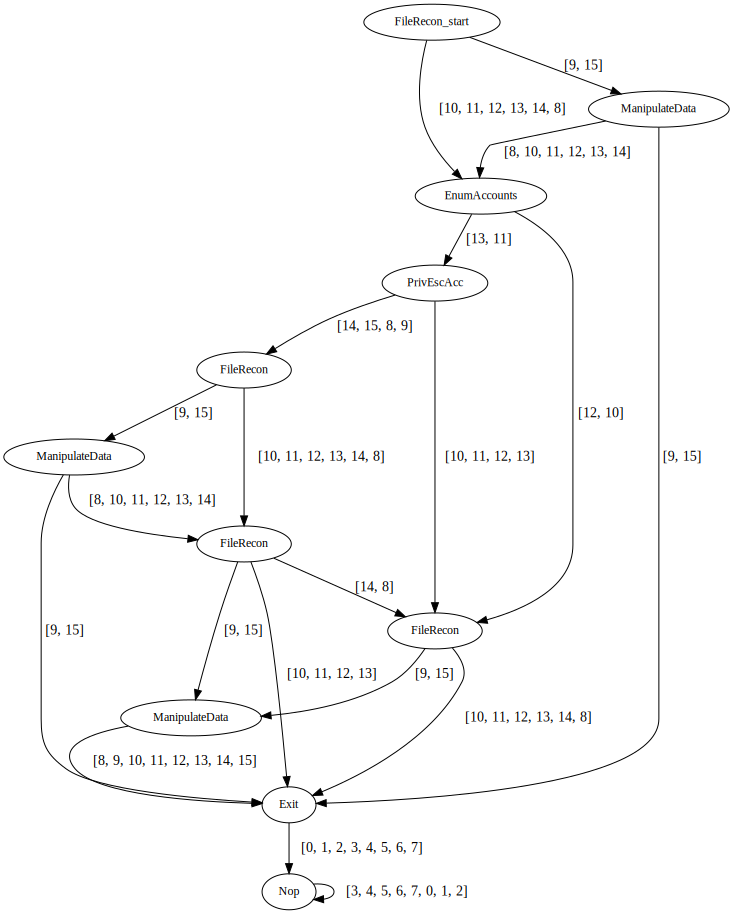

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/900298796_attl0_pol_graph.json
Edge map is:
0:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
1:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, active)]
2:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, active)]
3:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
4:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, active)]
5:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
6:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, active)]
7:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
8:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
9:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (Conn

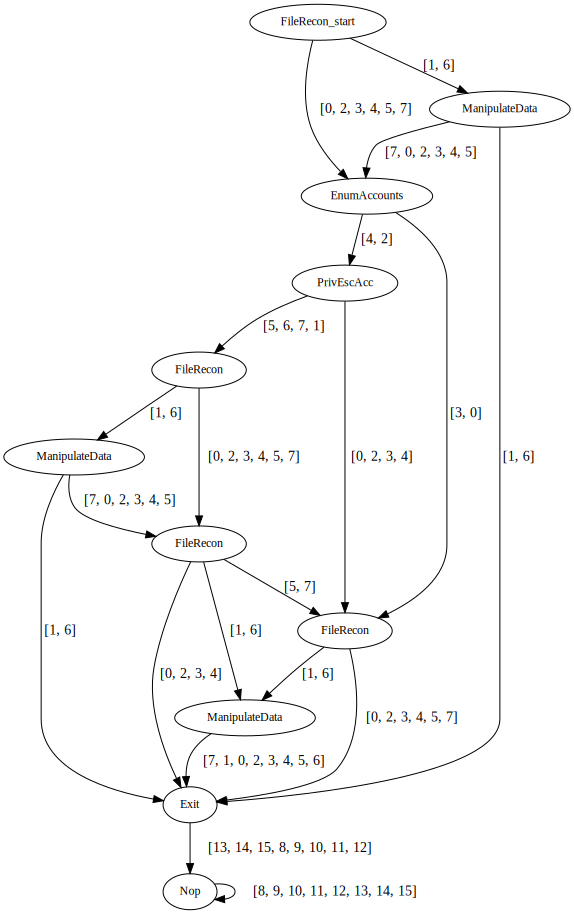

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/489411441_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


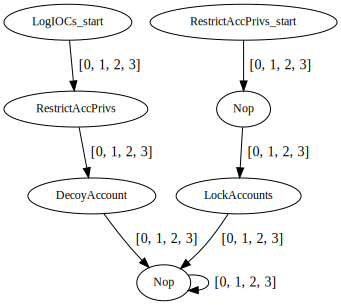

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/1141113940_defl1_passive_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


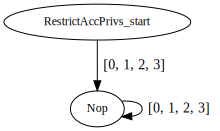

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/25936709_attl2_pol_graph.json
Edge map is:
0:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active), (DefenseObs, none)]
1:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active), (DefenseObs, perms_change)]
2:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active), (DefenseObs, acc_policy_change)]
3:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, active), (DefenseObs, none)]
4:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, active), (DefenseObs, acc_policy_change)]
5:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, active), (DefenseObs, perms_change)]
6:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, active), (DefenseObs, acc_policy_change)]
7:[(AccessPerm, denied), (HostObs, user_files), (ActionResul

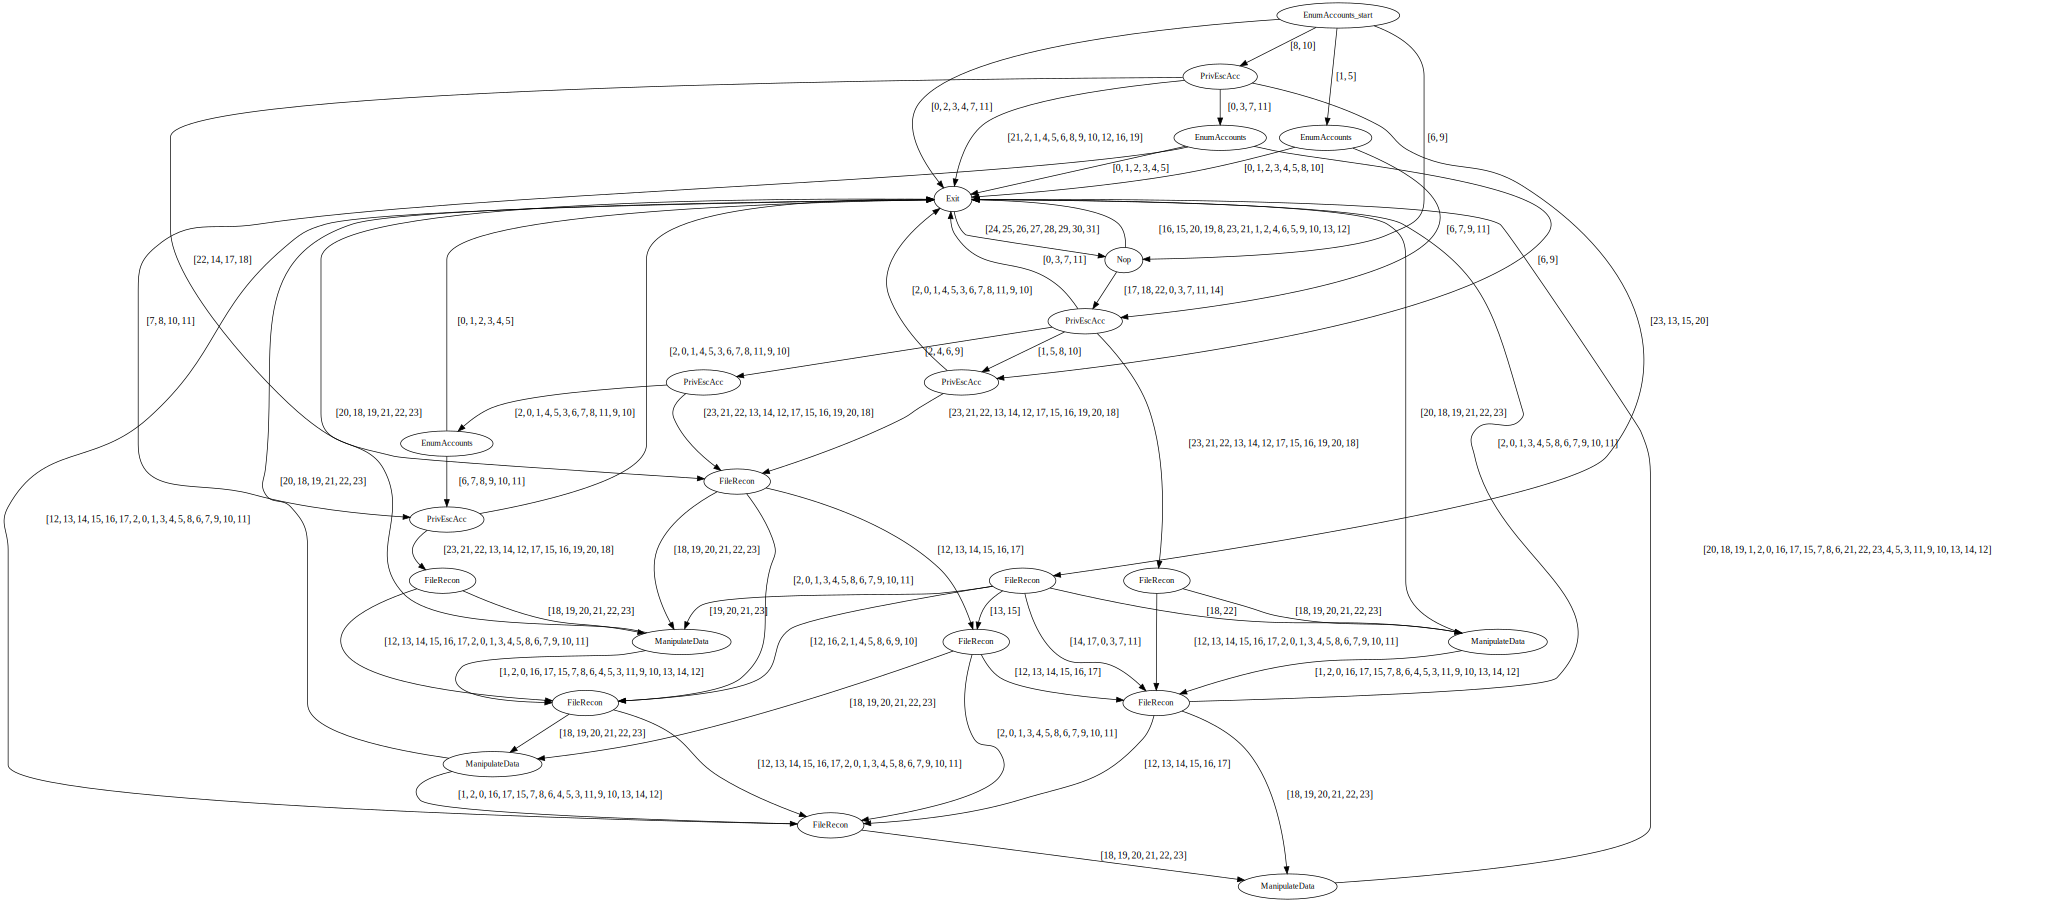

Displaying /home/ashinde/PhD/CaffineBravery/results_l3/1053632127_defl3_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


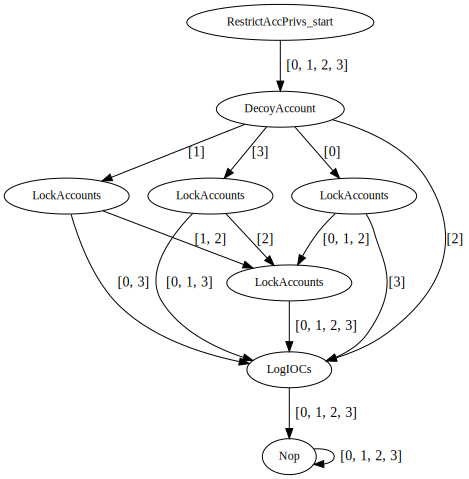

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l3/trace.4.json


+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                        file_enum
3                               1.0                       file_write
4                               1.0                             none
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                        file_enum
9                               1.0                             none

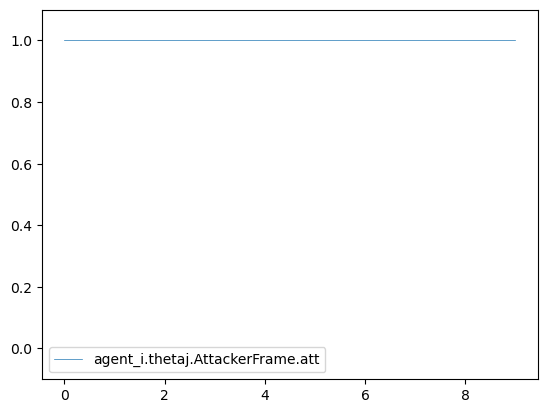

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.345454                        0.654545   
2                         0.334019                        0.665982   
3                         0.968140                        0.031860   
4                         0.900015                        0.099985   
5                         0.900015                        0.099985   
6                         0.900015                        0.099985   
7                         0.900015                        0.099985   
8                         0.900015                        0.099985   
9                         0.900015                        0.099985   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                         none   
2                          denied                   user_files   
3                          denied                   user_files   
4                          denied                   user_files   
5                            auth                   user_files   
6                            auth                         none   
7                            auth                         none   
8                          denied                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           failure                          active   
4                           failure                      terminated   
5                           failure                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

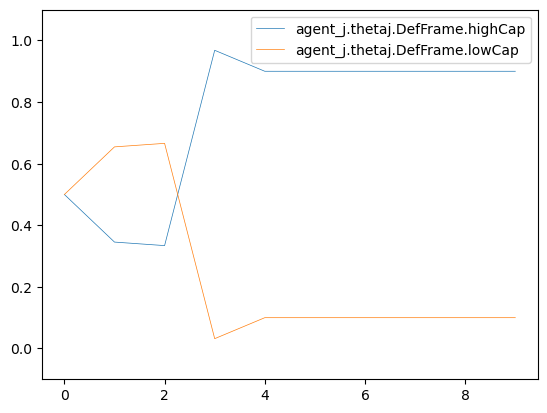

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   0.0                    1.0  RestrictAccPrivs   
1                   0.0                    1.0      DecoyAccount   
2                   0.0                    1.0      LockAccounts   
3                   0.0                    1.0      LockAccounts   
4                   0.0                    1.0           LogIOCs   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2     PrivEscAcc  
3     PrivEscAcc  
4           Exit  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

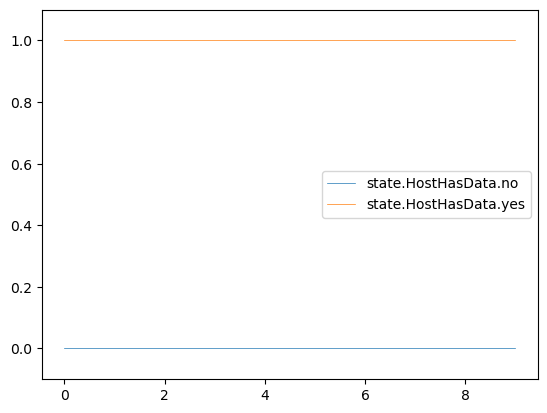

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     0.0                      1.0  RestrictAccPrivs   
1                     0.0                      1.0      DecoyAccount   
2                     0.0                      1.0      LockAccounts   
3                     0.0                      1.0      LockAccounts   
4                     0.0                      1.0           LogIOCs   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                        file_enum  
3     PrivEscAcc                       file_write  
4           Exit                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

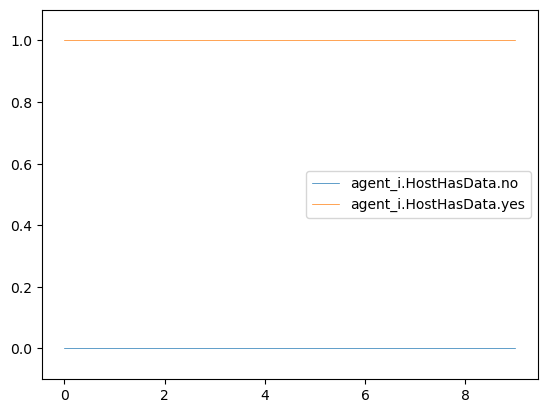

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.5                      0.5   EnumAccounts   
1                     0.5                      0.5   EnumAccounts   
2                     0.5                      0.5     PrivEscAcc   
3                     0.5                      0.5     PrivEscAcc   
4                     0.5                      0.5           Exit   
5                     0.5                      0.5            Nop   
6                     0.5                      0.5            Nop   
7                     0.5                      0.5            Nop   
8                     0.5                      0.5            Nop   
9                     0.5                      0.5            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                          denied   
3      LockAccounts                          denied   
4           LogIOCs                          denied   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                   user_files                           failure   
6                         none                           success   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active               acc_policy_change  
3                          active               acc_policy_change  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

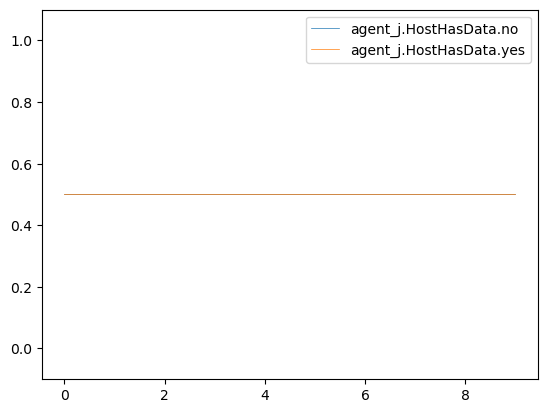

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action agent_j.action
0                 1.0                  0.0  RestrictAccPrivs   EnumAccounts
1                 1.0                  0.0      DecoyAccount   EnumAccounts
2                 1.0                  0.0      LockAccounts     PrivEscAcc
3                 1.0                  0.0      LockAccounts     PrivEscAcc
4                 1.0                  0.0           LogIOCs           Exit
5                 1.0                  0.0               Nop            Nop
6                 1.0                  0.0               Nop            Nop
7                 1.0                  0.0               Nop            Nop
8                 1.0                  0.0               Nop            Nop
9                 1.0                  0.0               Nop            Nop

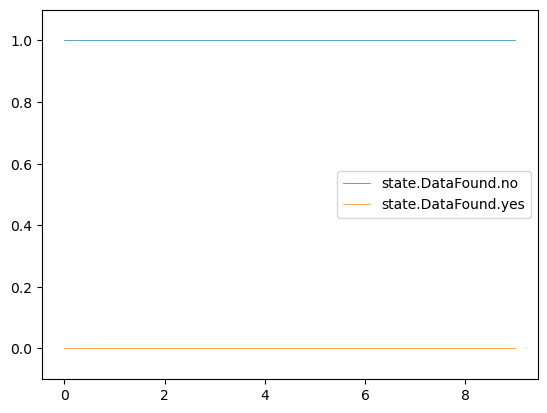

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000  RestrictAccPrivs   
1              1.000000               0.000000      DecoyAccount   
2              1.000000               0.000000      LockAccounts   
3              1.000000               0.000000      LockAccounts   
4              1.000000               0.000000           LogIOCs   
5              1.000000               0.000000               Nop   
6              1.000000               0.000000               Nop   
7              0.998188               0.001812               Nop   
8              0.999667               0.000333               Nop   
9              0.999431               0.000569               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                        file_enum  
3     PrivEscAcc                       file_write  
4           Exit                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

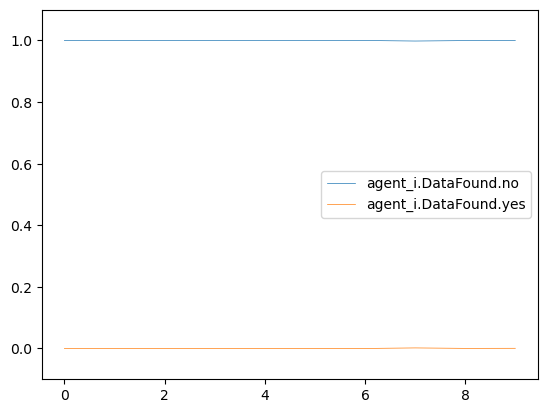

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  \
0                   1.0                    0.0   EnumAccounts   
1                   1.0                    0.0   EnumAccounts   
2                   1.0                    0.0     PrivEscAcc   
3                   1.0                    0.0     PrivEscAcc   
4                   1.0                    0.0           Exit   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                          denied   
3      LockAccounts                          denied   
4           LogIOCs                          denied   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                   user_files                           failure   
6                         none                           success   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active               acc_policy_change  
3                          active               acc_policy_change  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

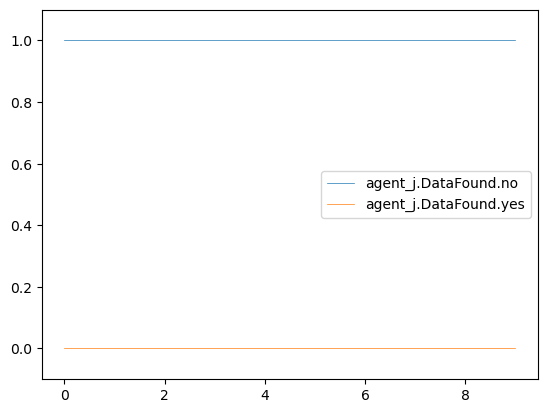

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0      LockAccounts   
3                    1.0                     0.0      LockAccounts   
4                    1.0                     0.0           LogIOCs   
5                    1.0                     0.0               Nop   
6                    1.0                     0.0               Nop   
7                    1.0                     0.0               Nop   
8                    1.0                     0.0               Nop   
9                    1.0                     0.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2     PrivEscAcc  
3     PrivEscAcc  
4           Exit  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

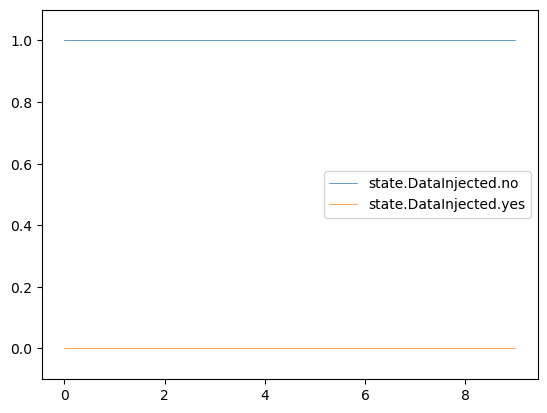

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000  RestrictAccPrivs   
1                 1.000000                  0.000000      DecoyAccount   
2                 1.000000                  0.000000      LockAccounts   
3                 1.000000                  0.000000      LockAccounts   
4                 1.000000                  0.000000           LogIOCs   
5                 1.000000                  0.000000               Nop   
6                 1.000000                  0.000000               Nop   
7                 1.000000                  0.000000               Nop   
8                 0.999767                  0.000234               Nop   
9                 0.999675                  0.000325               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                        file_enum  
3     PrivEscAcc                       file_write  
4           Exit                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

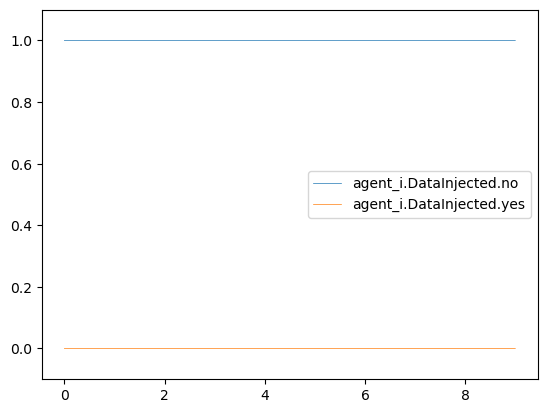

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0   EnumAccounts   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0     PrivEscAcc   
3                      1.0                       0.0     PrivEscAcc   
4                      1.0                       0.0           Exit   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                          denied   
3      LockAccounts                          denied   
4           LogIOCs                          denied   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                   user_files                           failure   
6                         none                           success   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active               acc_policy_change  
3                          active               acc_policy_change  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

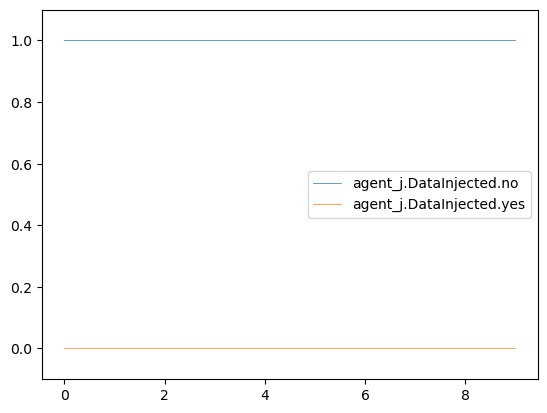

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action agent_j.action
0                   0.0                   1.0  RestrictAccPrivs   EnumAccounts
1                   1.0                   0.0      DecoyAccount   EnumAccounts
2                   1.0                   0.0      LockAccounts     PrivEscAcc
3                   1.0                   0.0      LockAccounts     PrivEscAcc
4                   1.0                   0.0           LogIOCs           Exit
5                   1.0                   0.0               Nop            Nop
6                   1.0                   0.0               Nop            Nop
7                   1.0                   0.0               Nop            Nop
8                   1.0                   0.0               Nop            Nop
9                   1.0                   0.0               Nop            Nop

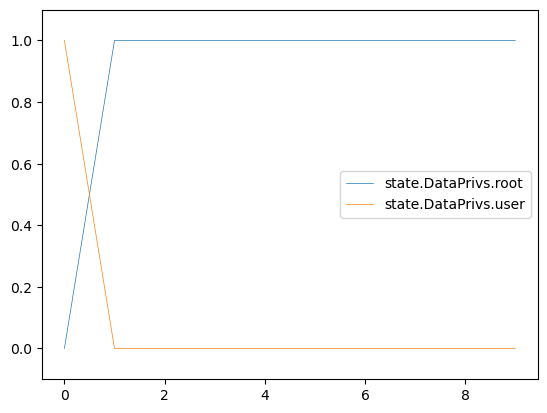

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     1.0                     0.0      DecoyAccount   
2                     1.0                     0.0      LockAccounts   
3                     1.0                     0.0      LockAccounts   
4                     1.0                     0.0           LogIOCs   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                        file_enum  
3     PrivEscAcc                       file_write  
4           Exit                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

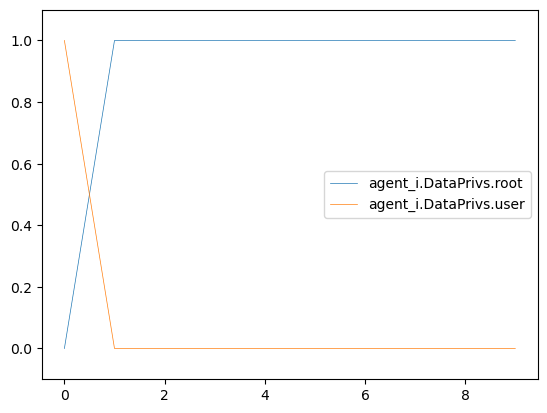

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000   EnumAccounts   
1                0.990909                0.009091   EnumAccounts   
2                1.000000                0.000000     PrivEscAcc   
3                1.000000                0.000000     PrivEscAcc   
4                1.000000                0.000000           Exit   
5                1.000000                0.000000            Nop   
6                1.000000                0.000000            Nop   
7                1.000000                0.000000            Nop   
8                1.000000                0.000000            Nop   
9                1.000000                0.000000            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                          denied   
3      LockAccounts                          denied   
4           LogIOCs                          denied   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                   user_files                           failure   
6                         none                           success   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active               acc_policy_change  
3                          active               acc_policy_change  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

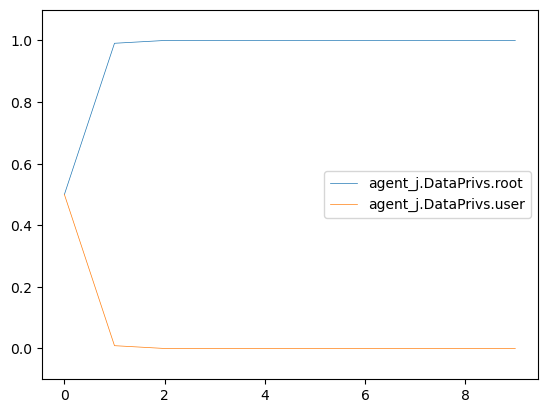

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action agent_j.action
0                1.0                 0.0  RestrictAccPrivs   EnumAccounts
1                1.0                 0.0      DecoyAccount   EnumAccounts
2                0.0                 1.0      LockAccounts     PrivEscAcc
3                0.0                 1.0      LockAccounts     PrivEscAcc
4                0.0                 1.0           LogIOCs           Exit
5                0.0                 1.0               Nop            Nop
6                0.0                 1.0               Nop            Nop
7                0.0                 1.0               Nop            Nop
8                0.0                 1.0               Nop            Nop
9                0.0                 1.0               Nop            Nop

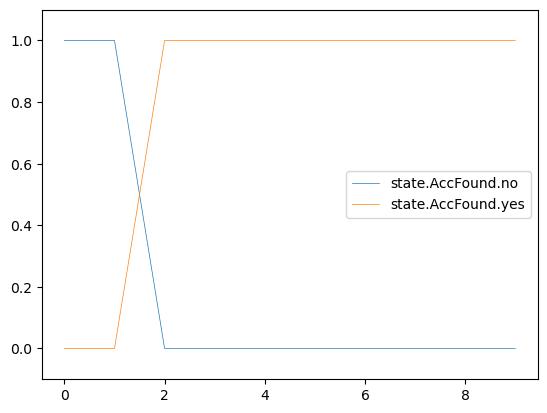

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action agent_j.action  \
0             1.000000              0.000000  RestrictAccPrivs   EnumAccounts   
1             1.000000              0.000000      DecoyAccount   EnumAccounts   
2             0.322696              0.677304      LockAccounts     PrivEscAcc   
3             0.312023              0.687977      LockAccounts     PrivEscAcc   
4             0.312023              0.687977           LogIOCs           Exit   
5             0.510279              0.489721               Nop            Nop   
6             0.564830              0.435170               Nop            Nop   
7             0.573604              0.426397               Nop            Nop   
8             0.574879              0.425121               Nop            Nop   
9             0.574721              0.425279               Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                       file_write  
4                             none  
5                             none  
6                             none  
7                             none  
8                        file_enum  
9                             none

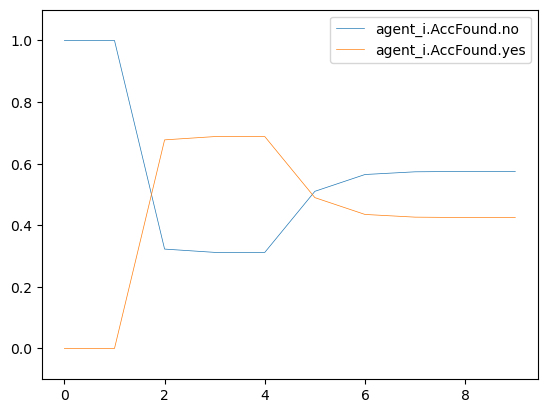

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action    agent_i.action  \
0             1.000000              0.000000   EnumAccounts  RestrictAccPrivs   
1             0.943548              0.056452   EnumAccounts      DecoyAccount   
2             0.296196              0.703804     PrivEscAcc      LockAccounts   
3             0.318654              0.681346     PrivEscAcc      LockAccounts   
4             1.000000              0.000000           Exit           LogIOCs   
5             1.000000              0.000000            Nop               Nop   
6             1.000000              0.000000            Nop               Nop   
7             1.000000              0.000000            Nop               Nop   
8             1.000000              0.000000            Nop               Nop   
9             1.000000              0.000000            Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                         none   
2                          denied                   user_files   
3                          denied                   user_files   
4                          denied                   user_files   
5                            auth                   user_files   
6                            auth                         none   
7                            auth                         none   
8                          denied                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           failure                          active   
4                           failure                      terminated   
5                           failure                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

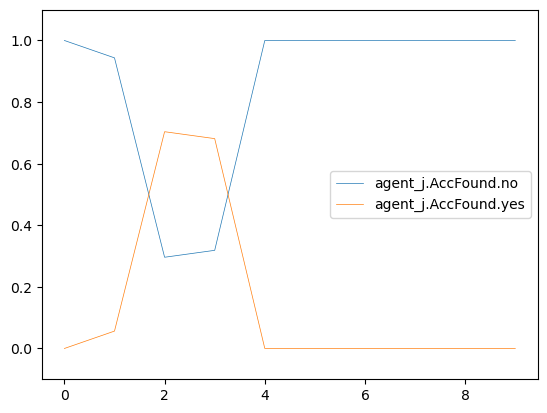

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes    agent_i.action agent_j.action
0                  1.0                   0.0  RestrictAccPrivs   EnumAccounts
1                  1.0                   0.0      DecoyAccount   EnumAccounts
2                  1.0                   0.0      LockAccounts     PrivEscAcc
3                  1.0                   0.0      LockAccounts     PrivEscAcc
4                  1.0                   0.0           LogIOCs           Exit
5                  0.0                   1.0               Nop            Nop
6                  0.0                   1.0               Nop            Nop
7                  0.0                   1.0               Nop            Nop
8                  0.0                   1.0               Nop            Nop
9                  0.0                   1.0               Nop            Nop

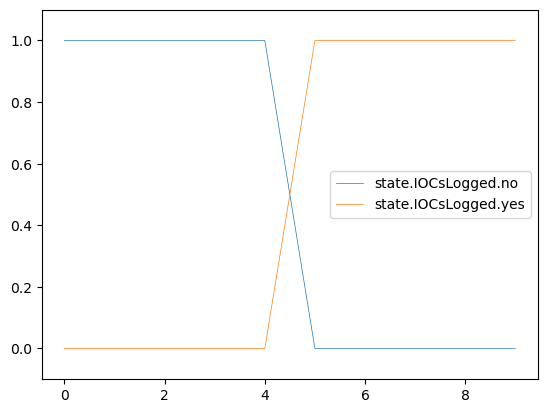

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0      LockAccounts   
3                    1.0                     0.0      LockAccounts   
4                    1.0                     0.0           LogIOCs   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                        file_enum  
3     PrivEscAcc                       file_write  
4           Exit                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

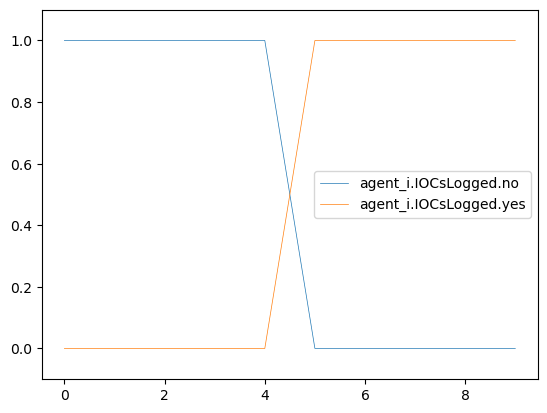

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0               1.000000                0.000000   EnumAccounts   
1               0.981818                0.018182   EnumAccounts   
2               0.998972                0.001028     PrivEscAcc   
3               0.999951                0.000049     PrivEscAcc   
4               0.999846                0.000154           Exit   
5               0.999846                0.000154            Nop   
6               0.999846                0.000154            Nop   
7               0.999846                0.000154            Nop   
8               0.999846                0.000154            Nop   
9               0.999846                0.000154            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                          denied   
3      LockAccounts                          denied   
4           LogIOCs                          denied   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                   user_files                           failure   
6                         none                           success   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active               acc_policy_change  
3                          active               acc_policy_change  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

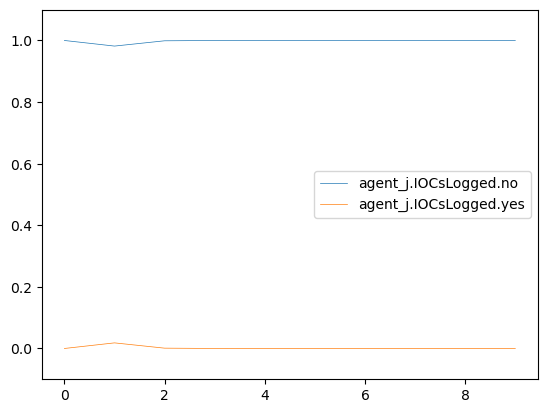

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   1.0                    0.0  RestrictAccPrivs   
1                   1.0                    0.0      DecoyAccount   
2                   0.0                    1.0      LockAccounts   
3                   0.0                    1.0      LockAccounts   
4                   0.0                    1.0           LogIOCs   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2     PrivEscAcc  
3     PrivEscAcc  
4           Exit  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

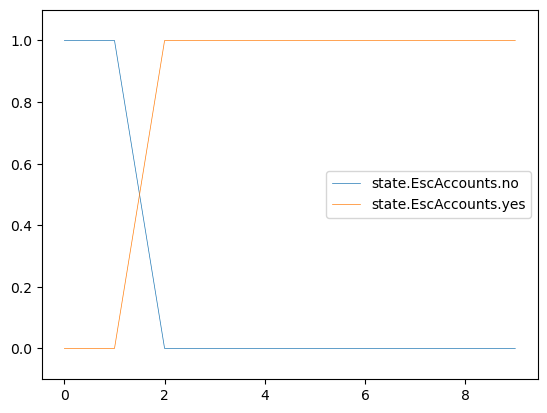

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0  RestrictAccPrivs   
1                     1.0                      0.0      DecoyAccount   
2                     0.0                      1.0      LockAccounts   
3                     0.0                      1.0      LockAccounts   
4                     0.0                      1.0           LogIOCs   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                        file_enum  
3     PrivEscAcc                       file_write  
4           Exit                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

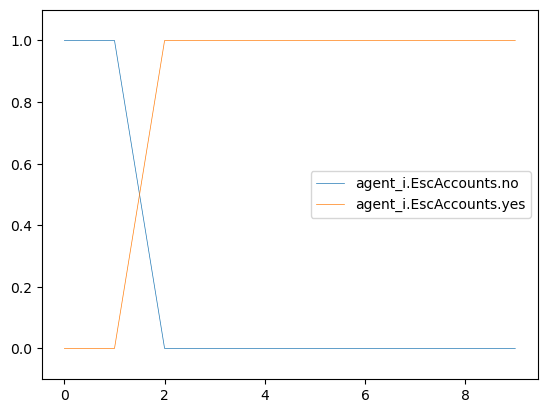

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000   EnumAccounts   
1                0.725806                 0.274194   EnumAccounts   
2                0.271739                 0.728261     PrivEscAcc   
3                0.292298                 0.707702     PrivEscAcc   
4                0.917290                 0.082710           Exit   
5                0.917290                 0.082710            Nop   
6                0.917290                 0.082710            Nop   
7                0.917290                 0.082710            Nop   
8                0.917290                 0.082710            Nop   
9                0.917290                 0.082710            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                          denied   
3      LockAccounts                          denied   
4           LogIOCs                          denied   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                   user_files                           failure   
6                         none                           success   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active               acc_policy_change  
3                          active               acc_policy_change  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

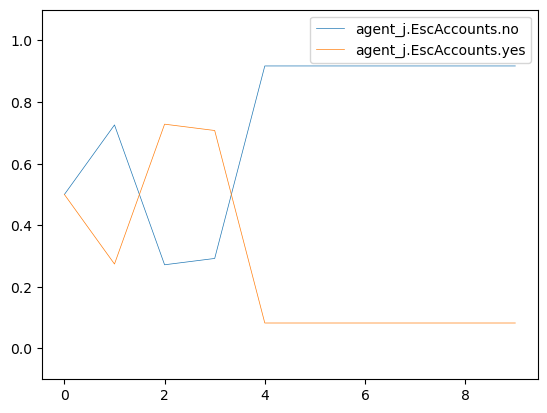

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action agent_j.action  
0                      1.0  RestrictAccPrivs   EnumAccounts  
1                      1.0      DecoyAccount   EnumAccounts  
2                      1.0      LockAccounts     PrivEscAcc  
3                      1.0      LockAccounts     PrivEscAcc  
4                      1.0           LogIOCs           Exit  
5                      1.0               Nop            Nop  
6                      1.0               Nop            Nop  
7                      1.0               Nop            Nop  
8                      1.0               Nop            Nop  
9                      1.0               Nop            Nop

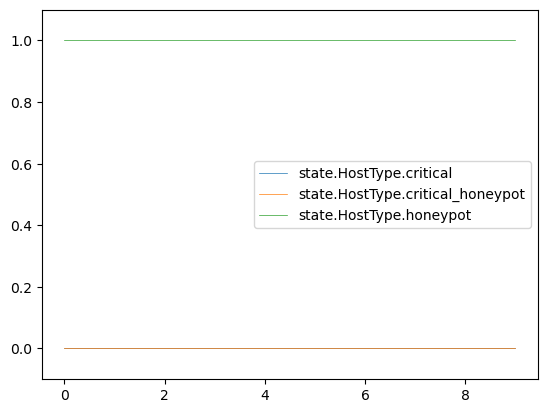

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action agent_j.action  \
0                        1.0  RestrictAccPrivs   EnumAccounts   
1                        1.0      DecoyAccount   EnumAccounts   
2                        1.0      LockAccounts     PrivEscAcc   
3                        1.0      LockAccounts     PrivEscAcc   
4                        1.0           LogIOCs           Exit   
5                        1.0               Nop            Nop   
6                        1.0               Nop            Nop   
7                        1.0               Nop            Nop   
8                        1.0               Nop            Nop   
9                        1.0               Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                        file_enum  
3                       file_write  
4                             none  
5                             none  
6                             none  
7                             none  
8                        file_enum  
9                             none

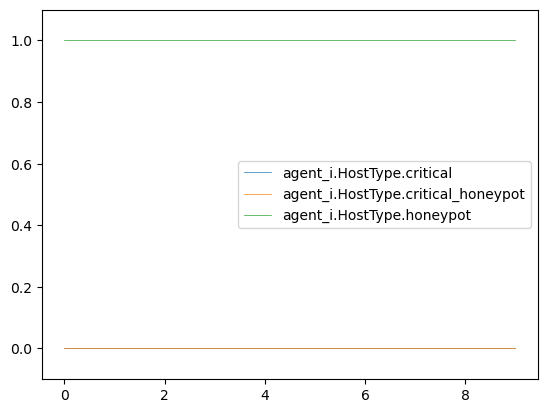

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot agent_j.action    agent_i.action  \
0                        0.0   EnumAccounts  RestrictAccPrivs   
1                        0.0   EnumAccounts      DecoyAccount   
2                        0.0     PrivEscAcc      LockAccounts   
3                        0.0     PrivEscAcc      LockAccounts   
4                        0.0           Exit           LogIOCs   
5                        0.0            Nop               Nop   
6                        0.0            Nop               Nop   
7                        0.0            Nop               Nop   
8                        0.0            Nop               Nop   
9                        0.0            Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                         none   
2                          denied                   user_files   
3                          denied                   user_files   
4                          denied                   user_files   
5                            auth                   user_files   
6                            auth                         none   
7                            auth                         none   
8                          denied                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           failure                          active   
4                           failure                      terminated   
5                           failure                      terminated   
6                           success                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

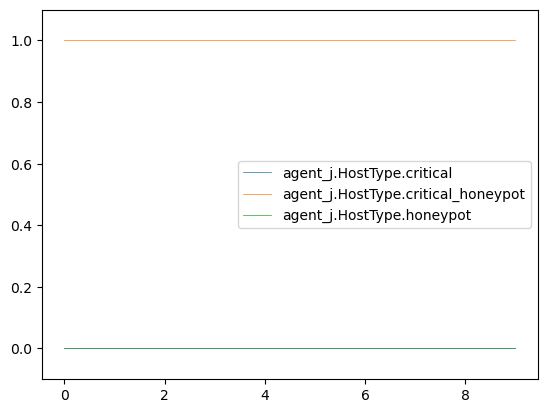

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     0.0                     1.0      DecoyAccount   
2                     0.0                     1.0      LockAccounts   
3                     0.0                     1.0      LockAccounts   
4                     0.0                     1.0           LogIOCs   
5                     0.0                     1.0               Nop   
6                     0.0                     1.0               Nop   
7                     0.0                     1.0               Nop   
8                     0.0                     1.0               Nop   
9                     0.0                     1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2     PrivEscAcc  
3     PrivEscAcc  
4           Exit  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

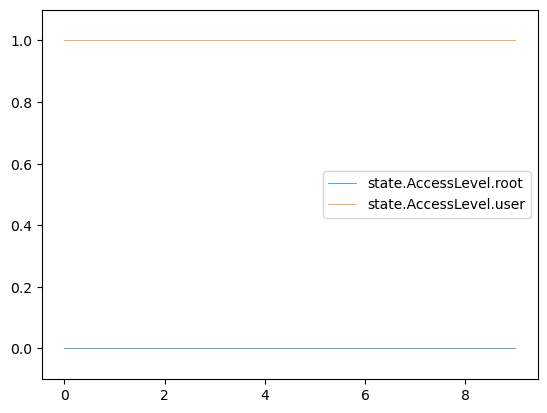

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000  RestrictAccPrivs   
1                  0.000000                  1.000000      DecoyAccount   
2                  0.000000                  1.000000      LockAccounts   
3                  0.000000                  1.000000      LockAccounts   
4                  0.000000                  1.000000           LogIOCs   
5                  0.000000                  1.000000               Nop   
6                  0.017844                  0.982156               Nop   
7                  0.002589                  0.997411               Nop   
8                  0.000371                  0.999629               Nop   
9                  0.000646                  0.999354               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                        file_enum  
3     PrivEscAcc                       file_write  
4           Exit                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

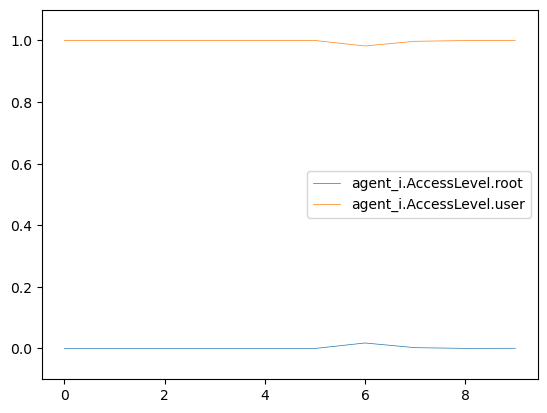

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0   EnumAccounts   
1                       0.0                       1.0   EnumAccounts   
2                       0.0                       1.0     PrivEscAcc   
3                       0.0                       1.0     PrivEscAcc   
4                       0.0                       1.0           Exit   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                          denied   
3      LockAccounts                          denied   
4           LogIOCs                          denied   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                   user_files                           failure   
6                         none                           success   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active               acc_policy_change  
3                          active               acc_policy_change  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

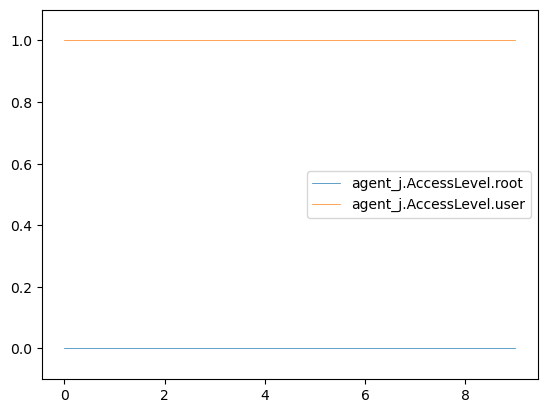

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action agent_j.action
0                 0.0                  1.0  RestrictAccPrivs   EnumAccounts
1                 0.0                  1.0      DecoyAccount   EnumAccounts
2                 0.0                  1.0      LockAccounts     PrivEscAcc
3                 0.0                  1.0      LockAccounts     PrivEscAcc
4                 0.0                  1.0           LogIOCs           Exit
5                 1.0                  0.0               Nop            Nop
6                 1.0                  0.0               Nop            Nop
7                 1.0                  0.0               Nop            Nop
8                 1.0                  0.0               Nop            Nop
9                 1.0                  0.0               Nop            Nop

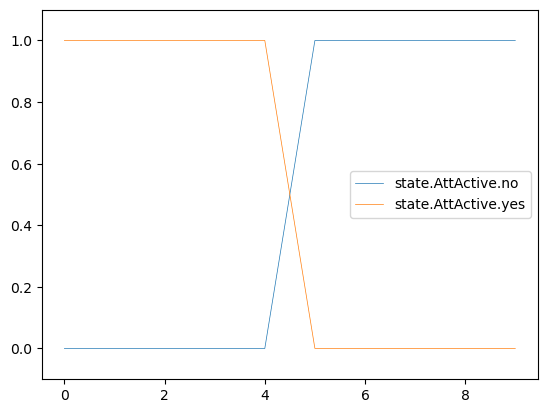

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.000000               1.000000  RestrictAccPrivs   
1              0.000000               1.000000      DecoyAccount   
2              0.016212               0.983788      LockAccounts   
3              0.349734               0.650266      LockAccounts   
4              0.408158               0.591842           LogIOCs   
5              0.872873               0.127127               Nop   
6              0.982128               0.017872               Nop   
7              0.997411               0.002589               Nop   
8              0.999629               0.000371               Nop   
9              0.999587               0.000413               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                        file_enum  
3     PrivEscAcc                       file_write  
4           Exit                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

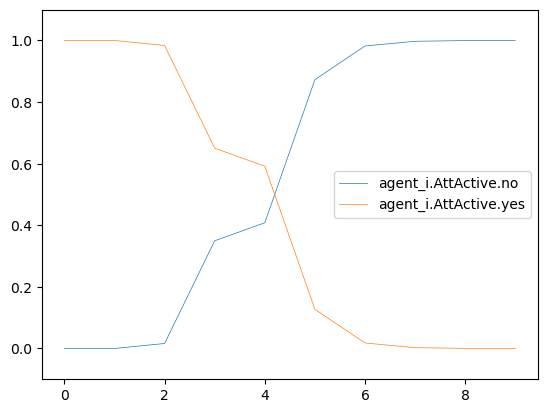

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  \
0                   0.0                    1.0   EnumAccounts   
1                   0.0                    1.0   EnumAccounts   
2                   0.0                    1.0     PrivEscAcc   
3                   0.0                    1.0     PrivEscAcc   
4                   0.0                    1.0           Exit   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                          denied   
3      LockAccounts                          denied   
4           LogIOCs                          denied   
5               Nop                            auth   
6               Nop                            auth   
7               Nop                            auth   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           failure   
5                   user_files                           failure   
6                         none                           success   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active               acc_policy_change  
3                          active               acc_policy_change  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

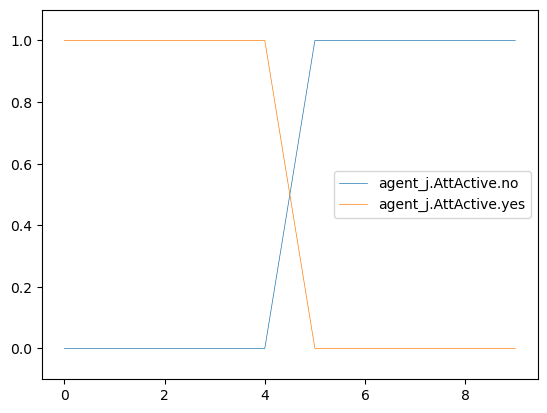

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                             none
2                               1.0                             none
3                               1.0                             none
4                               1.0                             none
5                               1.0                   login_activity
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                       file_write

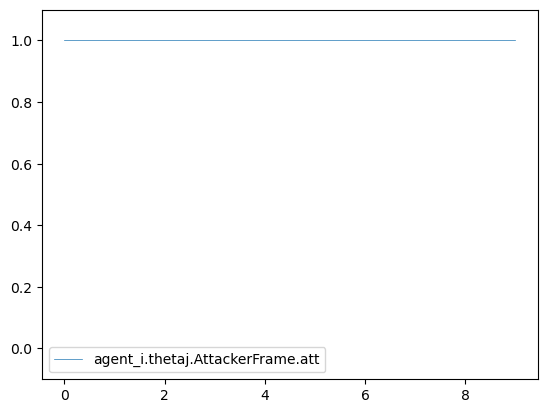

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                              0.5                             0.5   
1                              0.5                             0.5   
2                              0.5                             0.5   
3                              0.5                             0.5   
4                              0.5                             0.5   
5                              0.5                             0.5   
6                              0.5                             0.5   
7                              0.5                             0.5   
8                              0.5                             0.5   
9                              0.5                             0.5   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                          denied                   user_files   
3                            auth                         none   
4                          denied                         none   
5                            auth                         none   
6                          denied                   user_files   
7                          denied                         none   
8                            auth                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0               acc_policy_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

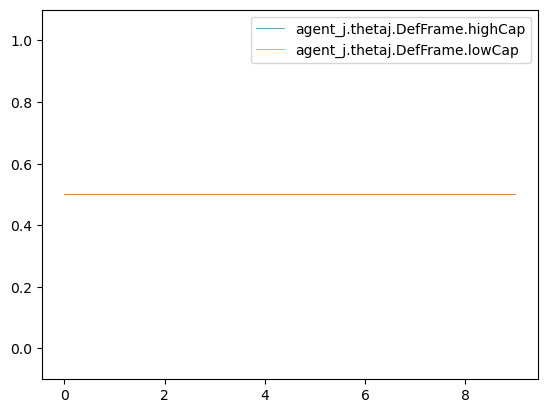

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   0.0                    1.0  RestrictAccPrivs   
1                   0.0                    1.0      DecoyAccount   
2                   0.0                    1.0      LockAccounts   
3                   0.0                    1.0           LogIOCs   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

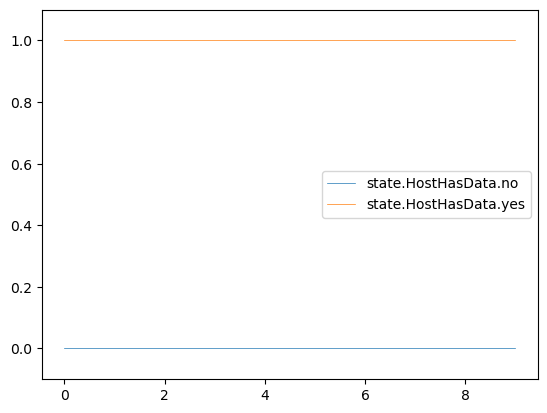

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     0.0                      1.0  RestrictAccPrivs   
1                     0.0                      1.0      DecoyAccount   
2                     0.0                      1.0      LockAccounts   
3                     0.0                      1.0           LogIOCs   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                   login_activity  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                       file_write

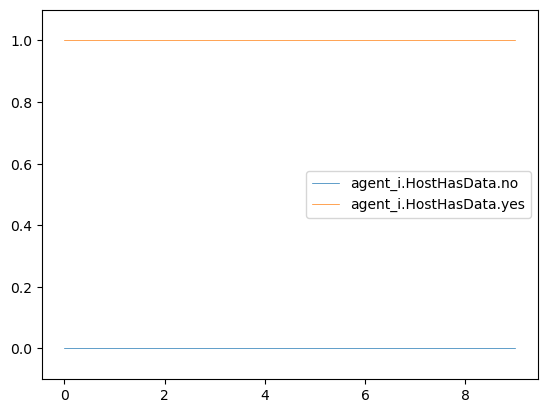

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.5                      0.5   EnumAccounts   
1                     0.5                      0.5           Exit   
2                     0.5                      0.5            Nop   
3                     0.5                      0.5            Nop   
4                     0.5                      0.5            Nop   
5                     0.5                      0.5            Nop   
6                     0.5                      0.5            Nop   
7                     0.5                      0.5            Nop   
8                     0.5                      0.5            Nop   
9                     0.5                      0.5            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                          denied   
3           LogIOCs                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           success   
6                   user_files                           failure   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active               acc_policy_change  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

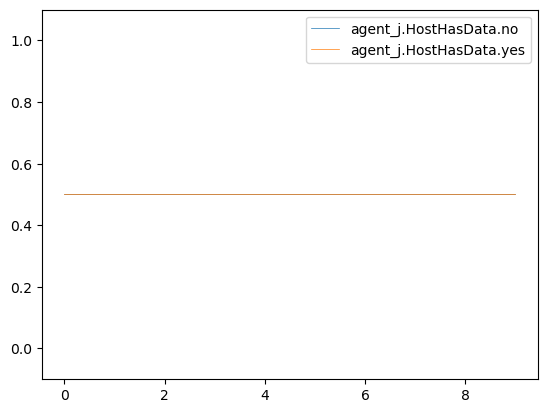

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action agent_j.action
0                 1.0                  0.0  RestrictAccPrivs   EnumAccounts
1                 1.0                  0.0      DecoyAccount           Exit
2                 1.0                  0.0      LockAccounts            Nop
3                 1.0                  0.0           LogIOCs            Nop
4                 1.0                  0.0               Nop            Nop
5                 1.0                  0.0               Nop            Nop
6                 1.0                  0.0               Nop            Nop
7                 1.0                  0.0               Nop            Nop
8                 1.0                  0.0               Nop            Nop
9                 1.0                  0.0               Nop            Nop

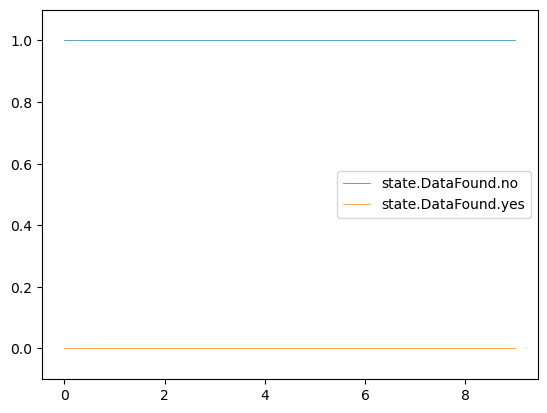

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000  RestrictAccPrivs   
1              1.000000               0.000000      DecoyAccount   
2              1.000000               0.000000      LockAccounts   
3              1.000000               0.000000           LogIOCs   
4              1.000000               0.000000               Nop   
5              0.998945               0.001055               Nop   
6              0.998645               0.001356               Nop   
7              0.998914               0.001086               Nop   
8              0.998982               0.001018               Nop   
9              0.998985               0.001014               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                   login_activity  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                       file_write

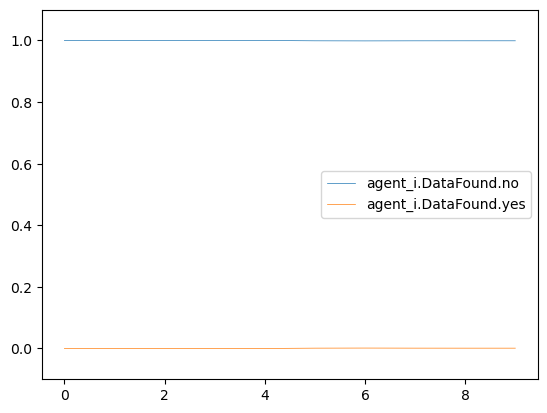

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  \
0                   1.0                    0.0   EnumAccounts   
1                   1.0                    0.0           Exit   
2                   1.0                    0.0            Nop   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                          denied   
3           LogIOCs                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           success   
6                   user_files                           failure   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active               acc_policy_change  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

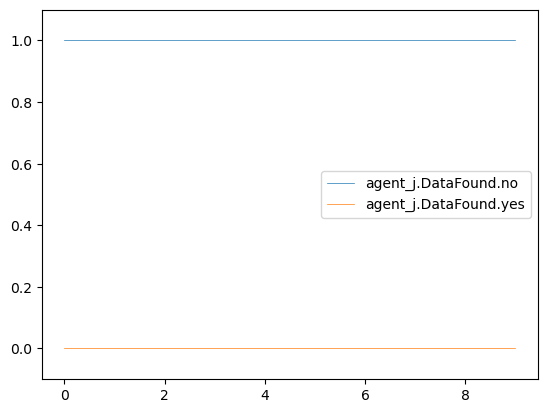

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0      LockAccounts   
3                    1.0                     0.0           LogIOCs   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    1.0                     0.0               Nop   
7                    1.0                     0.0               Nop   
8                    1.0                     0.0               Nop   
9                    1.0                     0.0               Nop   

  agent_j.action  
0   EnumAccounts  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

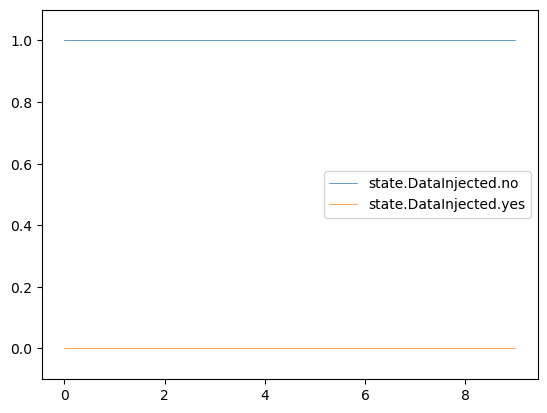

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000  RestrictAccPrivs   
1                 1.000000                  0.000000      DecoyAccount   
2                 1.000000                  0.000000      LockAccounts   
3                 1.000000                  0.000000           LogIOCs   
4                 1.000000                  0.000000               Nop   
5                 1.000000                  0.000000               Nop   
6                 0.999051                  0.000949               Nop   
7                 0.998998                  0.001002               Nop   
8                 0.998987                  0.001013               Nop   
9                 0.998987                  0.001013               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                   login_activity  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                       file_write

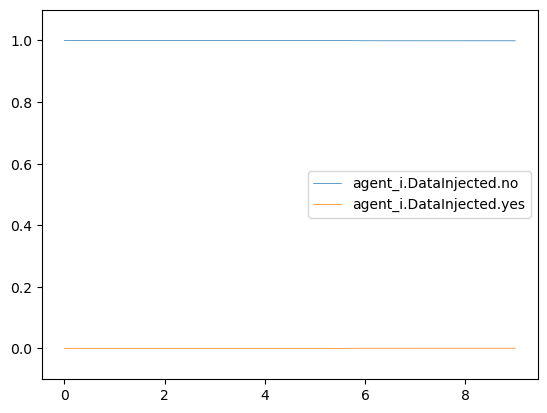

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0   EnumAccounts   
1                      1.0                       0.0           Exit   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                          denied   
3           LogIOCs                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           success   
6                   user_files                           failure   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active               acc_policy_change  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

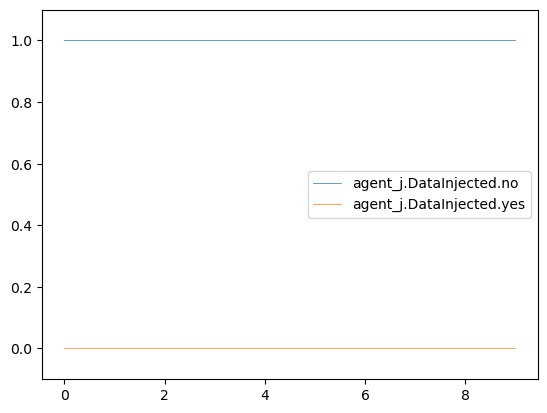

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action agent_j.action
0                   0.0                   1.0  RestrictAccPrivs   EnumAccounts
1                   1.0                   0.0      DecoyAccount           Exit
2                   1.0                   0.0      LockAccounts            Nop
3                   1.0                   0.0           LogIOCs            Nop
4                   1.0                   0.0               Nop            Nop
5                   1.0                   0.0               Nop            Nop
6                   1.0                   0.0               Nop            Nop
7                   1.0                   0.0               Nop            Nop
8                   1.0                   0.0               Nop            Nop
9                   1.0                   0.0               Nop            Nop

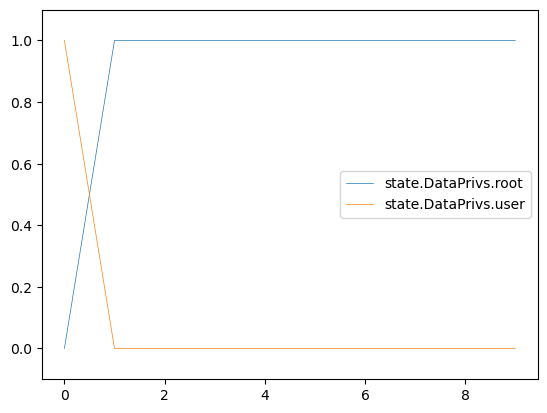

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     1.0                     0.0      DecoyAccount   
2                     1.0                     0.0      LockAccounts   
3                     1.0                     0.0           LogIOCs   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                   login_activity  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                       file_write

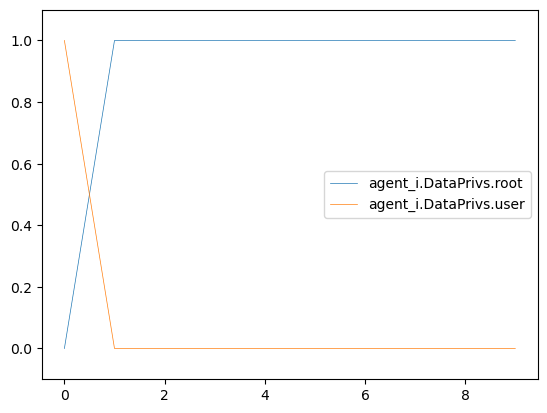

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                   0.500                   0.500   EnumAccounts   
1                   0.875                   0.125           Exit   
2                   1.000                   0.000            Nop   
3                   1.000                   0.000            Nop   
4                   1.000                   0.000            Nop   
5                   1.000                   0.000            Nop   
6                   1.000                   0.000            Nop   
7                   1.000                   0.000            Nop   
8                   1.000                   0.000            Nop   
9                   1.000                   0.000            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                          denied   
3           LogIOCs                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           success   
6                   user_files                           failure   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active               acc_policy_change  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

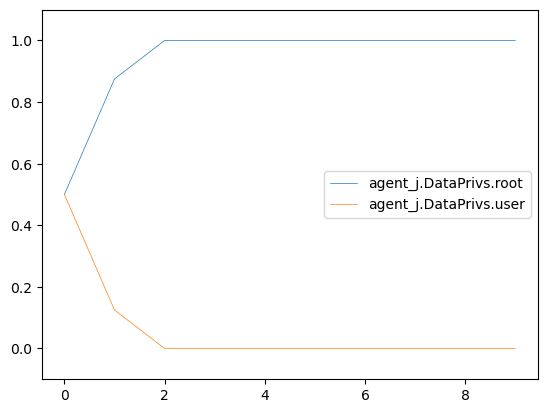

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action agent_j.action
0                1.0                 0.0  RestrictAccPrivs   EnumAccounts
1                1.0                 0.0      DecoyAccount           Exit
2                1.0                 0.0      LockAccounts            Nop
3                1.0                 0.0           LogIOCs            Nop
4                1.0                 0.0               Nop            Nop
5                1.0                 0.0               Nop            Nop
6                1.0                 0.0               Nop            Nop
7                1.0                 0.0               Nop            Nop
8                1.0                 0.0               Nop            Nop
9                1.0                 0.0               Nop            Nop

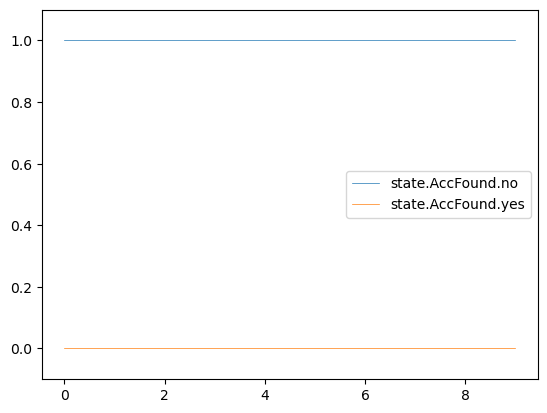

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action agent_j.action  \
0             1.000000              0.000000  RestrictAccPrivs   EnumAccounts   
1             1.000000              0.000000      DecoyAccount           Exit   
2             0.645625              0.354375      LockAccounts            Nop   
3             0.850626              0.149375           LogIOCs            Nop   
4             0.902972              0.097028               Nop            Nop   
5             0.910955              0.089045               Nop            Nop   
6             0.910459              0.089541               Nop            Nop   
7             0.911394              0.088606               Nop            Nop   
8             0.911482              0.088518               Nop            Nop   
9             0.911486              0.088514               Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                             none  
4                             none  
5                   login_activity  
6                             none  
7                             none  
8                             none  
9                       file_write

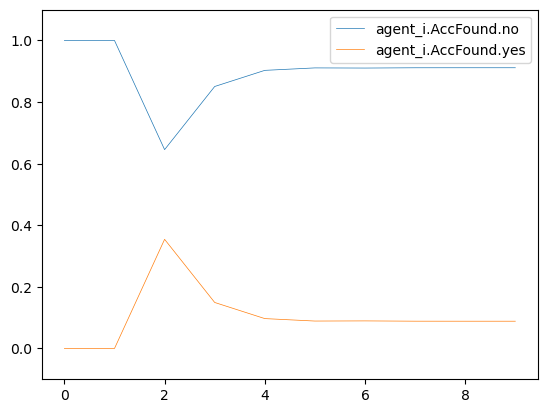

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action    agent_i.action  \
0             1.000000              0.000000   EnumAccounts  RestrictAccPrivs   
1             0.943548              0.056452           Exit      DecoyAccount   
2             0.943548              0.056452            Nop      LockAccounts   
3             0.943548              0.056452            Nop           LogIOCs   
4             0.943548              0.056452            Nop               Nop   
5             0.943548              0.056452            Nop               Nop   
6             0.943548              0.056452            Nop               Nop   
7             0.943548              0.056452            Nop               Nop   
8             0.943548              0.056452            Nop               Nop   
9             0.943548              0.056452            Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                          denied                   user_files   
3                            auth                         none   
4                          denied                         none   
5                            auth                         none   
6                          denied                   user_files   
7                          denied                         none   
8                            auth                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0               acc_policy_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

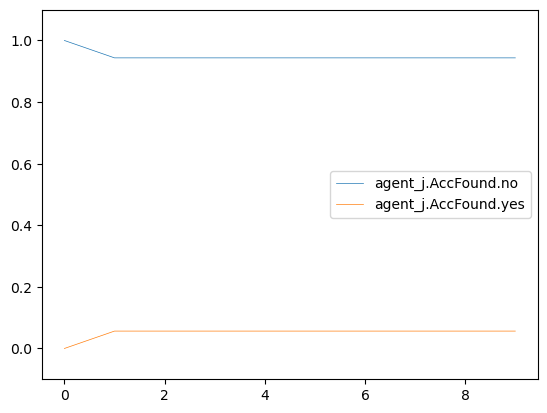

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes    agent_i.action agent_j.action
0                  1.0                   0.0  RestrictAccPrivs   EnumAccounts
1                  1.0                   0.0      DecoyAccount           Exit
2                  1.0                   0.0      LockAccounts            Nop
3                  1.0                   0.0           LogIOCs            Nop
4                  0.0                   1.0               Nop            Nop
5                  0.0                   1.0               Nop            Nop
6                  0.0                   1.0               Nop            Nop
7                  0.0                   1.0               Nop            Nop
8                  0.0                   1.0               Nop            Nop
9                  0.0                   1.0               Nop            Nop

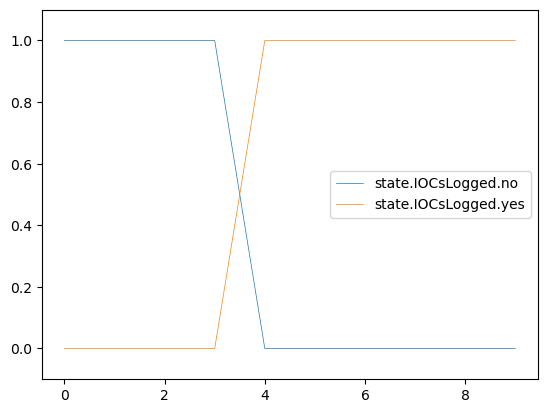

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0      LockAccounts   
3                    1.0                     0.0           LogIOCs   
4                    0.0                     1.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                   login_activity  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                       file_write

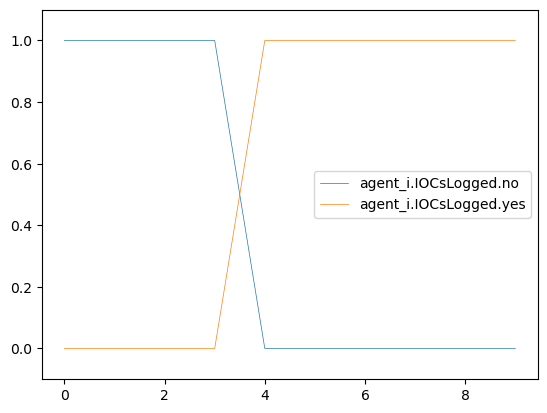

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0                   1.00                    0.00   EnumAccounts   
1                   0.75                    0.25           Exit   
2                   0.75                    0.25            Nop   
3                   0.75                    0.25            Nop   
4                   0.75                    0.25            Nop   
5                   0.75                    0.25            Nop   
6                   0.75                    0.25            Nop   
7                   0.75                    0.25            Nop   
8                   0.75                    0.25            Nop   
9                   0.75                    0.25            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                          denied   
3           LogIOCs                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           success   
6                   user_files                           failure   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active               acc_policy_change  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

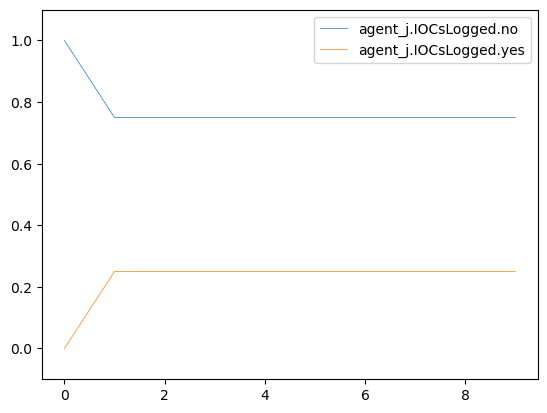

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   1.0                    0.0  RestrictAccPrivs   
1                   1.0                    0.0      DecoyAccount   
2                   0.0                    1.0      LockAccounts   
3                   0.0                    1.0           LogIOCs   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

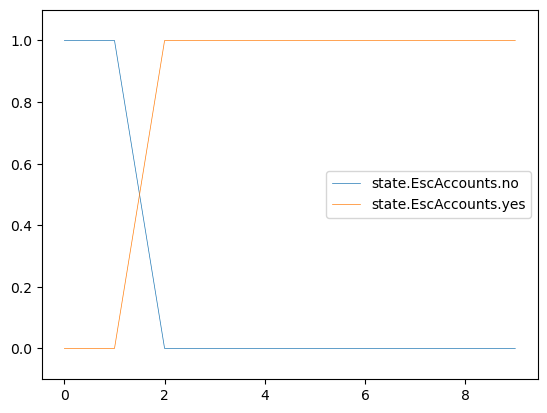

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0  RestrictAccPrivs   
1                     1.0                      0.0      DecoyAccount   
2                     0.0                      1.0      LockAccounts   
3                     0.0                      1.0           LogIOCs   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                   login_activity  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                       file_write

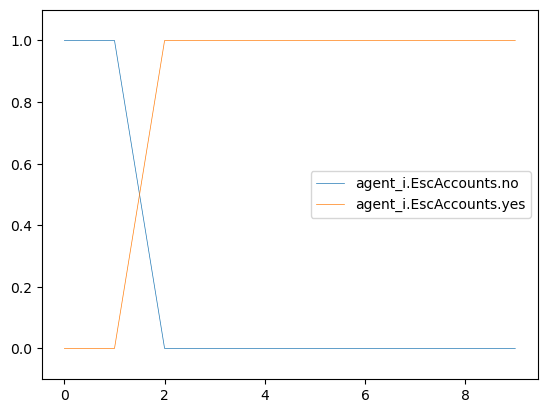

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000   EnumAccounts   
1                0.725806                 0.274194           Exit   
2                0.725806                 0.274194            Nop   
3                0.544355                 0.455645            Nop   
4                0.544355                 0.455645            Nop   
5                0.544355                 0.455645            Nop   
6                0.544355                 0.455645            Nop   
7                0.544355                 0.455645            Nop   
8                0.544355                 0.455645            Nop   
9                0.544355                 0.455645            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                          denied   
3           LogIOCs                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           success   
6                   user_files                           failure   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active               acc_policy_change  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

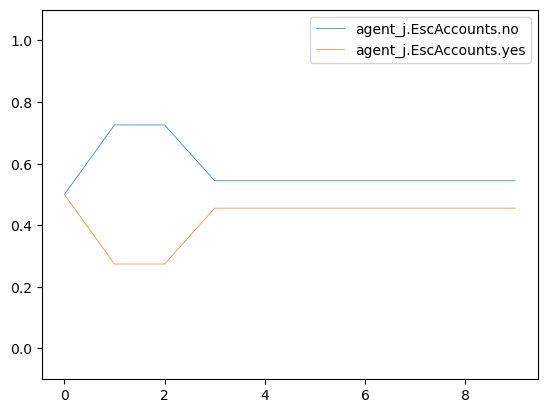

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action agent_j.action  
0                      1.0  RestrictAccPrivs   EnumAccounts  
1                      1.0      DecoyAccount           Exit  
2                      1.0      LockAccounts            Nop  
3                      1.0           LogIOCs            Nop  
4                      1.0               Nop            Nop  
5                      1.0               Nop            Nop  
6                      1.0               Nop            Nop  
7                      1.0               Nop            Nop  
8                      1.0               Nop            Nop  
9                      1.0               Nop            Nop

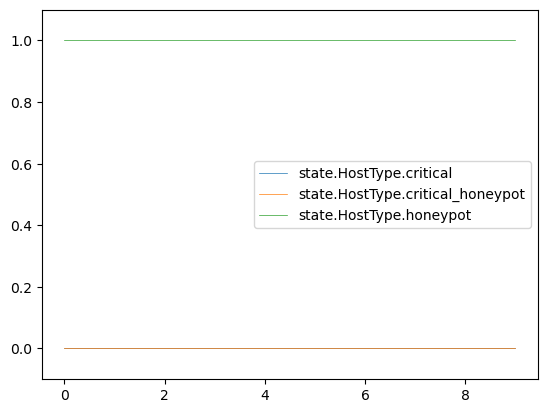

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action agent_j.action  \
0                        1.0  RestrictAccPrivs   EnumAccounts   
1                        1.0      DecoyAccount           Exit   
2                        1.0      LockAccounts            Nop   
3                        1.0           LogIOCs            Nop   
4                        1.0               Nop            Nop   
5                        1.0               Nop            Nop   
6                        1.0               Nop            Nop   
7                        1.0               Nop            Nop   
8                        1.0               Nop            Nop   
9                        1.0               Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                             none  
3                             none  
4                             none  
5                   login_activity  
6                             none  
7                             none  
8                             none  
9                       file_write

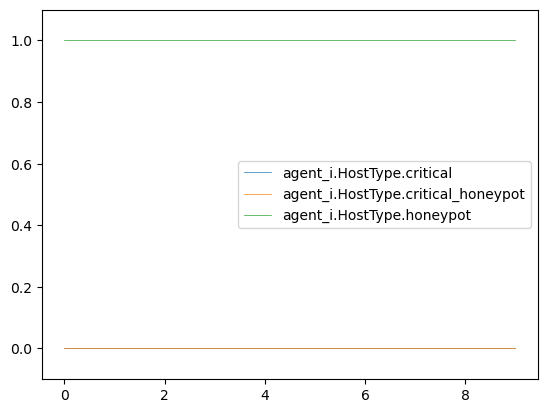

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot agent_j.action    agent_i.action  \
0                        0.0   EnumAccounts  RestrictAccPrivs   
1                        0.0           Exit      DecoyAccount   
2                        0.0            Nop      LockAccounts   
3                        0.0            Nop           LogIOCs   
4                        0.0            Nop               Nop   
5                        0.0            Nop               Nop   
6                        0.0            Nop               Nop   
7                        0.0            Nop               Nop   
8                        0.0            Nop               Nop   
9                        0.0            Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                          denied                   user_files   
3                            auth                         none   
4                          denied                         none   
5                            auth                         none   
6                          denied                   user_files   
7                          denied                         none   
8                            auth                         none   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           failure                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0               acc_policy_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

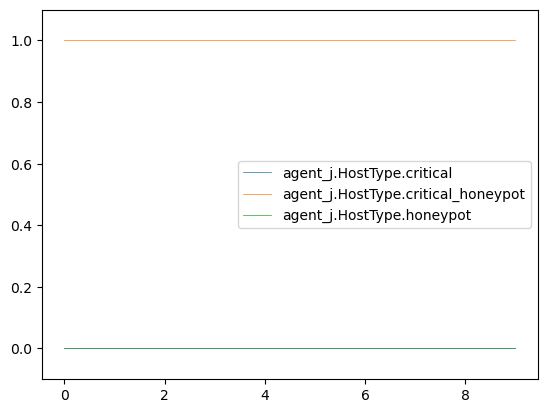

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     0.0                     1.0      DecoyAccount   
2                     0.0                     1.0      LockAccounts   
3                     0.0                     1.0           LogIOCs   
4                     0.0                     1.0               Nop   
5                     0.0                     1.0               Nop   
6                     0.0                     1.0               Nop   
7                     0.0                     1.0               Nop   
8                     0.0                     1.0               Nop   
9                     0.0                     1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

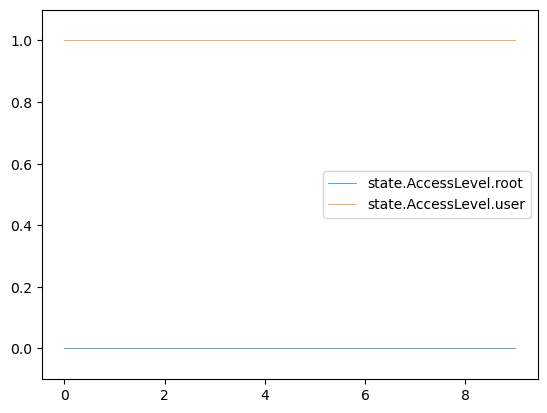

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000  RestrictAccPrivs   
1                  0.000000                  1.000000      DecoyAccount   
2                  0.000000                  1.000000      LockAccounts   
3                  0.000000                  1.000000           LogIOCs   
4                  0.010451                  0.989549               Nop   
5                  0.001508                  0.998492               Nop   
6                  0.002145                  0.997855               Nop   
7                  0.001121                  0.998879               Nop   
8                  0.001024                  0.998976               Nop   
9                  0.001019                  0.998981               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                   login_activity  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                       file_write

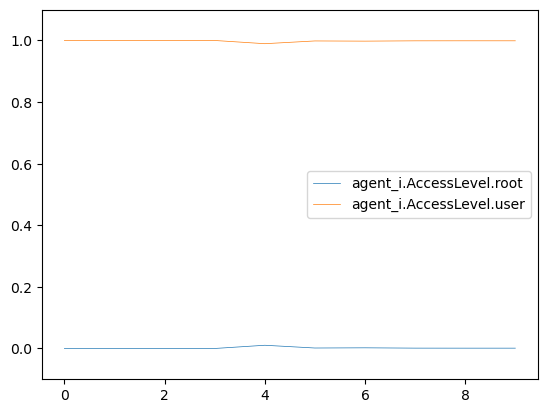

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0   EnumAccounts   
1                       0.0                       1.0           Exit   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                          denied   
3           LogIOCs                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           success   
6                   user_files                           failure   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active               acc_policy_change  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

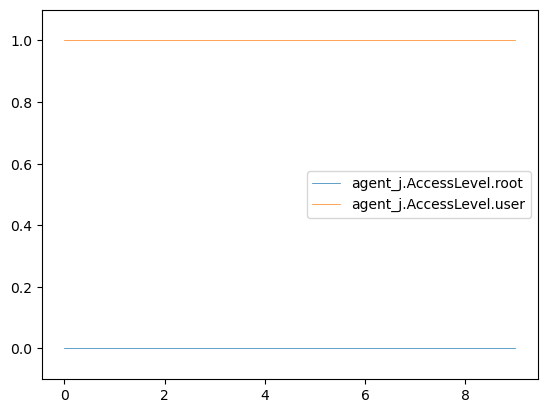

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action agent_j.action
0                 0.0                  1.0  RestrictAccPrivs   EnumAccounts
1                 0.0                  1.0      DecoyAccount           Exit
2                 1.0                  0.0      LockAccounts            Nop
3                 1.0                  0.0           LogIOCs            Nop
4                 1.0                  0.0               Nop            Nop
5                 1.0                  0.0               Nop            Nop
6                 1.0                  0.0               Nop            Nop
7                 1.0                  0.0               Nop            Nop
8                 1.0                  0.0               Nop            Nop
9                 1.0                  0.0               Nop            Nop

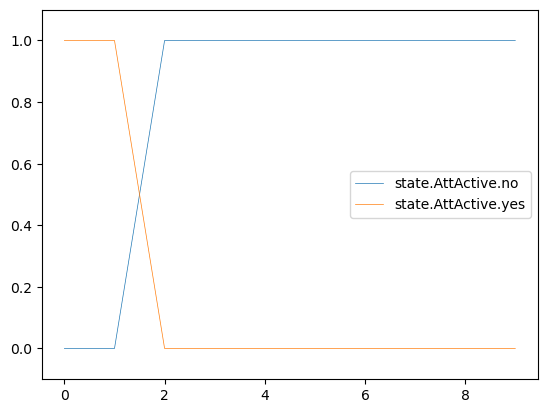

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.000000           1.000000e+00  RestrictAccPrivs   
1              0.000000           1.000000e+00      DecoyAccount   
2              0.415625           5.843750e-01      LockAccounts   
3              0.917038           8.296178e-02           LogIOCs   
4              0.988440           1.156016e-02               Nop   
5              0.998347           1.652620e-03               Nop   
6              0.997824           2.175533e-03               Nop   
7              0.999829           1.711323e-04               Nop   
8              0.999984           1.618267e-05               Nop   
9              0.999999           7.393547e-07               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                             none  
3            Nop                             none  
4            Nop                             none  
5            Nop                   login_activity  
6            Nop                             none  
7            Nop                             none  
8            Nop                             none  
9            Nop                       file_write

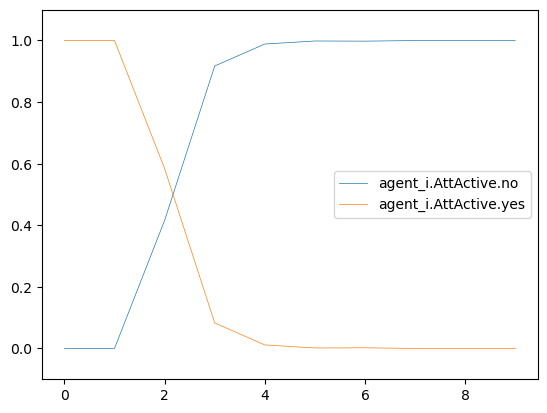

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  \
0                   0.0                    1.0   EnumAccounts   
1                   0.0                    1.0           Exit   
2                   1.0                    0.0            Nop   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                          denied   
3           LogIOCs                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           failure   
4                         none                           failure   
5                         none                           success   
6                   user_files                           failure   
7                         none                           success   
8                         none                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active               acc_policy_change  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

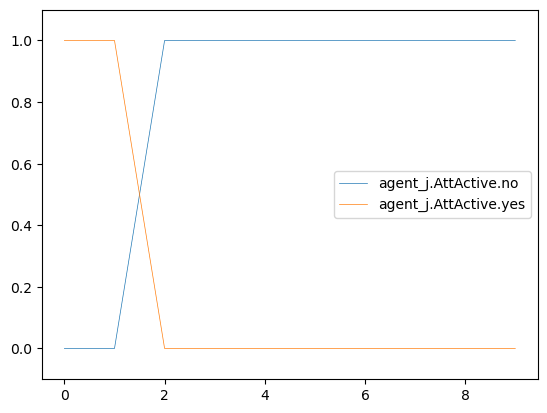

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                             none
1                               1.0                             none
2                               1.0                             none
3                               1.0                             none
4                               1.0                   login_activity
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                        file_enum
9                               1.0                             none

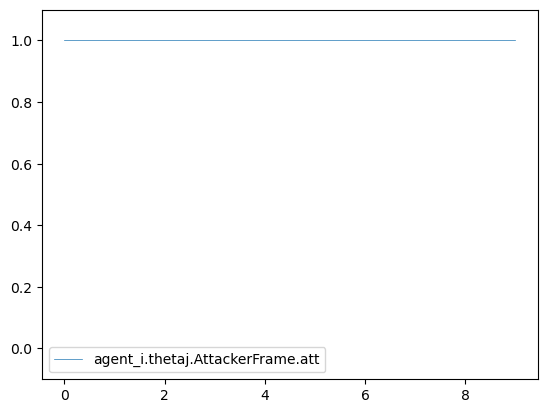

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.345454                        0.654545   
2                         0.334019                        0.665982   
3                         0.334019                        0.665982   
4                         0.334019                        0.665982   
5                         0.334019                        0.665982   
6                         0.334019                        0.665982   
7                         0.334019                        0.665982   
8                         0.334019                        0.665982   
9                         0.334019                        0.665982   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                         none   
2                            auth                   user_files   
3                            auth                   user_files   
4                          denied                   user_files   
5                            auth                         none   
6                          denied                   user_files   
7                          denied                   user_files   
8                          denied                   user_files   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

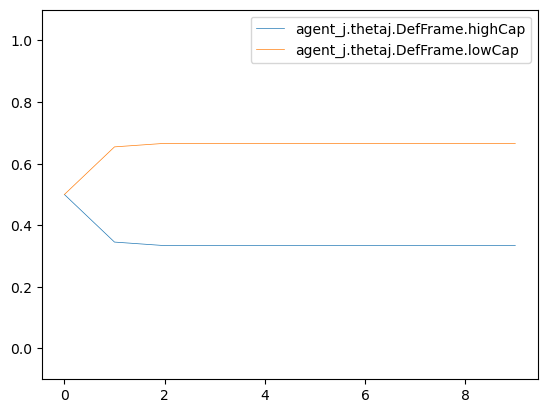

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   0.0                    1.0  RestrictAccPrivs   
1                   0.0                    1.0      DecoyAccount   
2                   0.0                    1.0      LockAccounts   
3                   0.0                    1.0           LogIOCs   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2           Exit  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

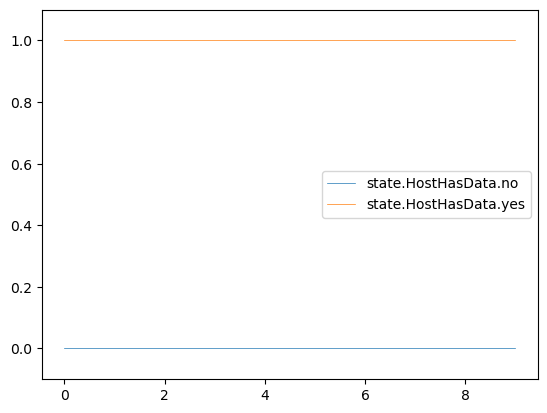

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     0.0                      1.0  RestrictAccPrivs   
1                     0.0                      1.0      DecoyAccount   
2                     0.0                      1.0      LockAccounts   
3                     0.0                      1.0           LogIOCs   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1   EnumAccounts                             none  
2           Exit                             none  
3            Nop                             none  
4            Nop                   login_activity  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

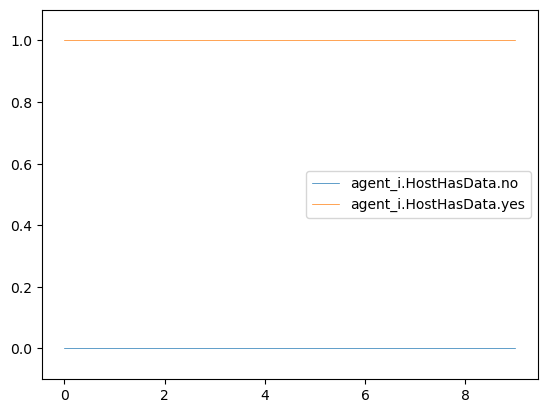

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.5                      0.5   EnumAccounts   
1                     0.5                      0.5   EnumAccounts   
2                     0.5                      0.5           Exit   
3                     0.5                      0.5            Nop   
4                     0.5                      0.5            Nop   
5                     0.5                      0.5            Nop   
6                     0.5                      0.5            Nop   
7                     0.5                      0.5            Nop   
8                     0.5                      0.5            Nop   
9                     0.5                      0.5            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                            auth   
3           LogIOCs                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                   user_files                           failure   
3                   user_files                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           failure   
7                   user_files                           success   
8                   user_files                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

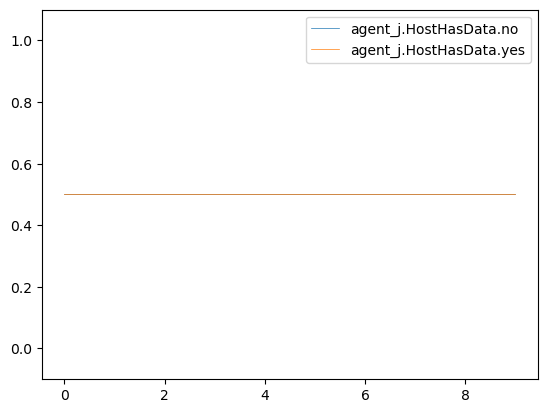

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action agent_j.action
0                 1.0                  0.0  RestrictAccPrivs   EnumAccounts
1                 1.0                  0.0      DecoyAccount   EnumAccounts
2                 1.0                  0.0      LockAccounts           Exit
3                 1.0                  0.0           LogIOCs            Nop
4                 1.0                  0.0               Nop            Nop
5                 1.0                  0.0               Nop            Nop
6                 1.0                  0.0               Nop            Nop
7                 1.0                  0.0               Nop            Nop
8                 1.0                  0.0               Nop            Nop
9                 1.0                  0.0               Nop            Nop

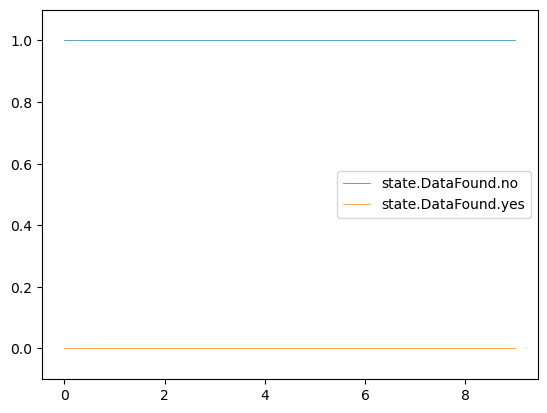

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000  RestrictAccPrivs   
1              1.000000               0.000000      DecoyAccount   
2              1.000000               0.000000      LockAccounts   
3              1.000000               0.000000           LogIOCs   
4              1.000000               0.000000               Nop   
5              0.992684               0.007316               Nop   
6              0.998644               0.001356               Nop   
7              0.998969               0.001031               Nop   
8              0.998993               0.001007               Nop   
9              0.998992               0.001009               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1   EnumAccounts                             none  
2           Exit                             none  
3            Nop                             none  
4            Nop                   login_activity  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

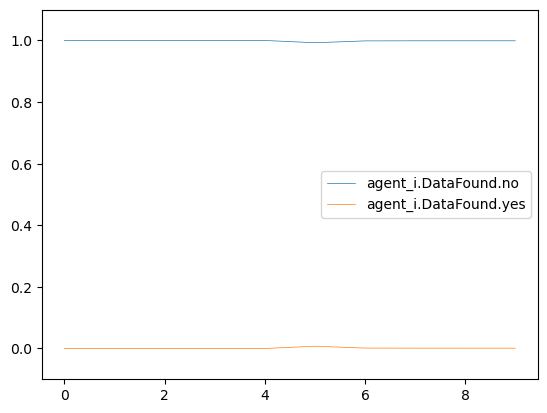

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  \
0                   1.0                    0.0   EnumAccounts   
1                   1.0                    0.0   EnumAccounts   
2                   1.0                    0.0           Exit   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                            auth   
3           LogIOCs                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                   user_files                           failure   
3                   user_files                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           failure   
7                   user_files                           success   
8                   user_files                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

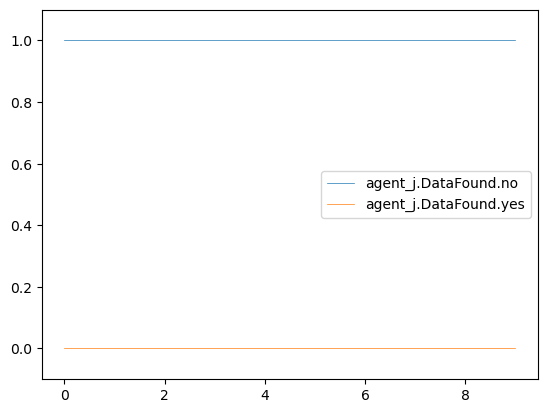

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0      LockAccounts   
3                    1.0                     0.0           LogIOCs   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    1.0                     0.0               Nop   
7                    1.0                     0.0               Nop   
8                    1.0                     0.0               Nop   
9                    1.0                     0.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2           Exit  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

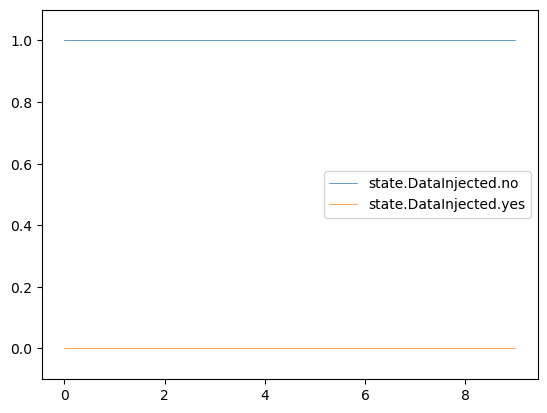

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000  RestrictAccPrivs   
1                 1.000000                  0.000000      DecoyAccount   
2                 1.000000                  0.000000      LockAccounts   
3                 1.000000                  0.000000           LogIOCs   
4                 1.000000                  0.000000               Nop   
5                 1.000000                  0.000000               Nop   
6                 0.999050                  0.000950               Nop   
7                 0.998998                  0.001002               Nop   
8                 0.998995                  0.001005               Nop   
9                 0.998994                  0.001006               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1   EnumAccounts                             none  
2           Exit                             none  
3            Nop                             none  
4            Nop                   login_activity  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

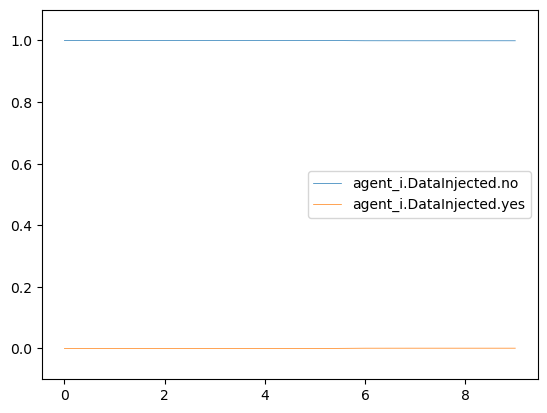

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0   EnumAccounts   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0           Exit   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                            auth   
3           LogIOCs                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                   user_files                           failure   
3                   user_files                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           failure   
7                   user_files                           success   
8                   user_files                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

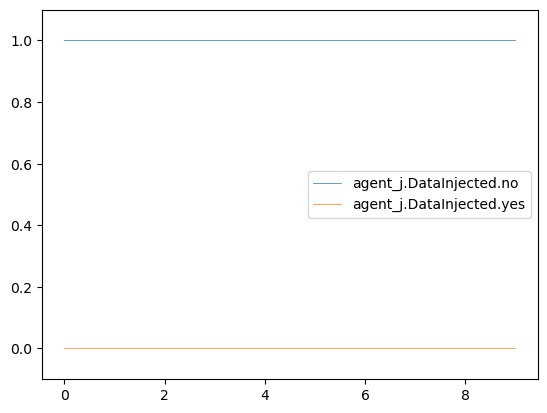

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action agent_j.action
0                   0.0                   1.0  RestrictAccPrivs   EnumAccounts
1                   1.0                   0.0      DecoyAccount   EnumAccounts
2                   1.0                   0.0      LockAccounts           Exit
3                   1.0                   0.0           LogIOCs            Nop
4                   1.0                   0.0               Nop            Nop
5                   1.0                   0.0               Nop            Nop
6                   1.0                   0.0               Nop            Nop
7                   1.0                   0.0               Nop            Nop
8                   1.0                   0.0               Nop            Nop
9                   1.0                   0.0               Nop            Nop

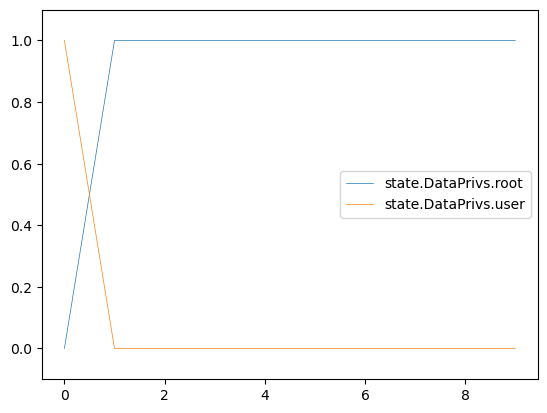

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     1.0                     0.0      DecoyAccount   
2                     1.0                     0.0      LockAccounts   
3                     1.0                     0.0           LogIOCs   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1   EnumAccounts                             none  
2           Exit                             none  
3            Nop                             none  
4            Nop                   login_activity  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

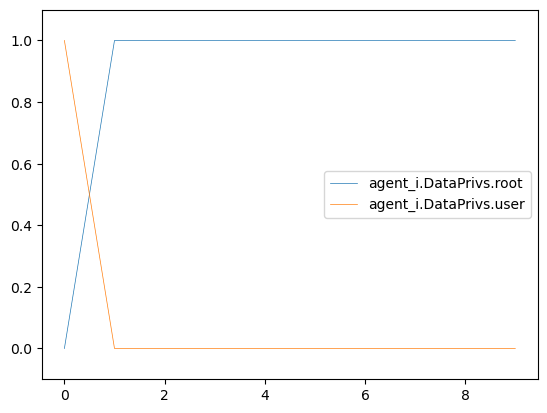

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000   EnumAccounts   
1                0.990909                0.009091   EnumAccounts   
2                1.000000                0.000000           Exit   
3                1.000000                0.000000            Nop   
4                1.000000                0.000000            Nop   
5                1.000000                0.000000            Nop   
6                1.000000                0.000000            Nop   
7                1.000000                0.000000            Nop   
8                1.000000                0.000000            Nop   
9                1.000000                0.000000            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                            auth   
3           LogIOCs                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                   user_files                           failure   
3                   user_files                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           failure   
7                   user_files                           success   
8                   user_files                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

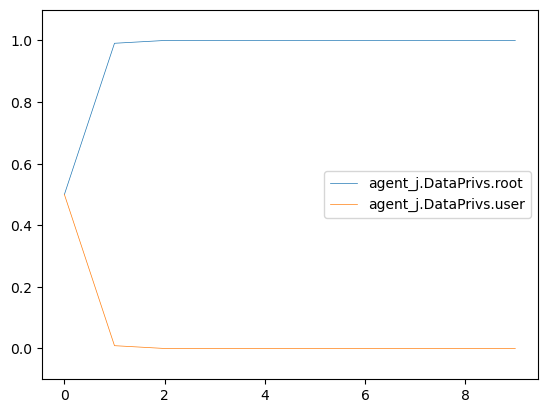

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action agent_j.action
0                1.0                 0.0  RestrictAccPrivs   EnumAccounts
1                1.0                 0.0      DecoyAccount   EnumAccounts
2                1.0                 0.0      LockAccounts           Exit
3                1.0                 0.0           LogIOCs            Nop
4                1.0                 0.0               Nop            Nop
5                1.0                 0.0               Nop            Nop
6                1.0                 0.0               Nop            Nop
7                1.0                 0.0               Nop            Nop
8                1.0                 0.0               Nop            Nop
9                1.0                 0.0               Nop            Nop

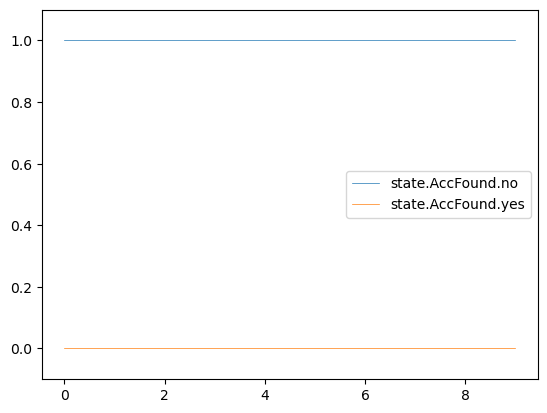

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action agent_j.action  \
0             1.000000              0.000000  RestrictAccPrivs   EnumAccounts   
1             1.000000              0.000000      DecoyAccount   EnumAccounts   
2             0.645625              0.354375      LockAccounts           Exit   
3             0.850626              0.149375           LogIOCs            Nop   
4             0.902972              0.097028               Nop            Nop   
5             0.902269              0.097731               Nop            Nop   
6             0.910921              0.089080               Nop            Nop   
7             0.911428              0.088572               Nop            Nop   
8             0.911456              0.088544               Nop            Nop   
9             0.911454              0.088546               Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                             none  
2                             none  
3                             none  
4                   login_activity  
5                             none  
6                             none  
7                             none  
8                        file_enum  
9                             none

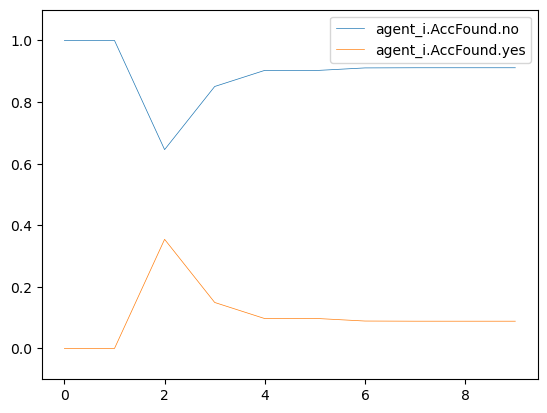

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action    agent_i.action  \
0             1.000000              0.000000   EnumAccounts  RestrictAccPrivs   
1             0.943548              0.056452   EnumAccounts      DecoyAccount   
2             0.971501              0.028499           Exit      LockAccounts   
3             0.971501              0.028499            Nop           LogIOCs   
4             0.971501              0.028499            Nop               Nop   
5             0.971501              0.028499            Nop               Nop   
6             0.971501              0.028499            Nop               Nop   
7             0.971501              0.028499            Nop               Nop   
8             0.971501              0.028499            Nop               Nop   
9             0.971501              0.028499            Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                         none   
2                            auth                   user_files   
3                            auth                   user_files   
4                          denied                   user_files   
5                            auth                         none   
6                          denied                   user_files   
7                          denied                   user_files   
8                          denied                   user_files   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

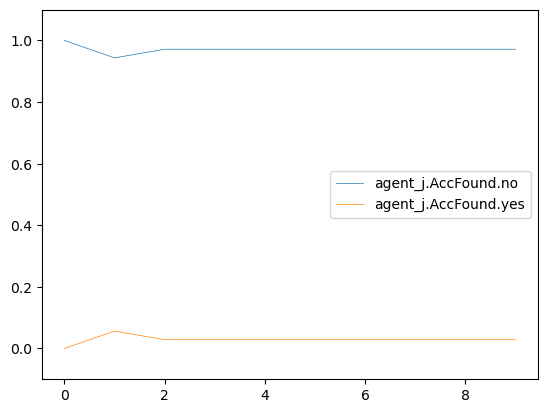

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes    agent_i.action agent_j.action
0                  1.0                   0.0  RestrictAccPrivs   EnumAccounts
1                  1.0                   0.0      DecoyAccount   EnumAccounts
2                  1.0                   0.0      LockAccounts           Exit
3                  1.0                   0.0           LogIOCs            Nop
4                  0.0                   1.0               Nop            Nop
5                  0.0                   1.0               Nop            Nop
6                  0.0                   1.0               Nop            Nop
7                  0.0                   1.0               Nop            Nop
8                  0.0                   1.0               Nop            Nop
9                  0.0                   1.0               Nop            Nop

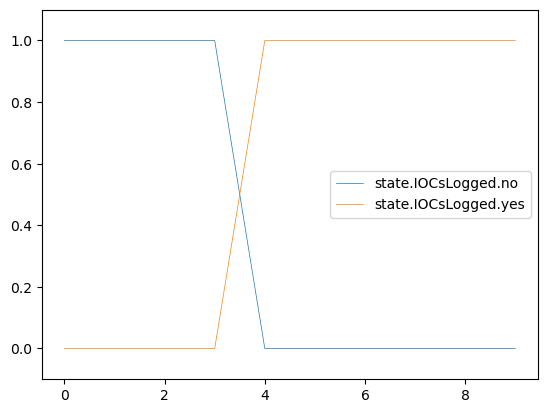

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0      LockAccounts   
3                    1.0                     0.0           LogIOCs   
4                    0.0                     1.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1   EnumAccounts                             none  
2           Exit                             none  
3            Nop                             none  
4            Nop                   login_activity  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

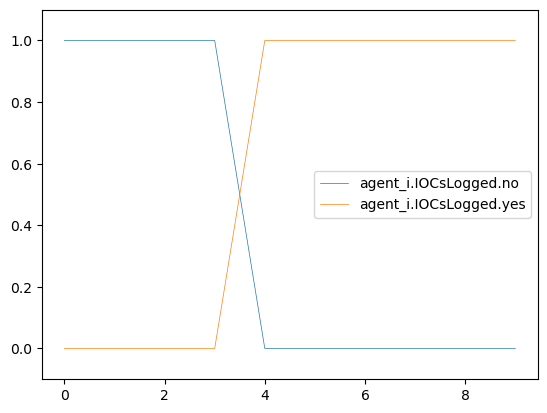

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0               1.000000                0.000000   EnumAccounts   
1               0.981818                0.018182   EnumAccounts   
2               0.998972                0.001028           Exit   
3               0.998972                0.001028            Nop   
4               0.998972                0.001028            Nop   
5               0.998972                0.001028            Nop   
6               0.998972                0.001028            Nop   
7               0.998972                0.001028            Nop   
8               0.998972                0.001028            Nop   
9               0.998972                0.001028            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                            auth   
3           LogIOCs                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                   user_files                           failure   
3                   user_files                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           failure   
7                   user_files                           success   
8                   user_files                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

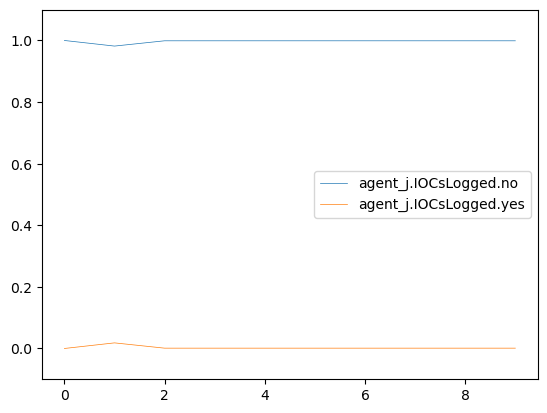

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   1.0                    0.0  RestrictAccPrivs   
1                   1.0                    0.0      DecoyAccount   
2                   0.0                    1.0      LockAccounts   
3                   0.0                    1.0           LogIOCs   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2           Exit  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

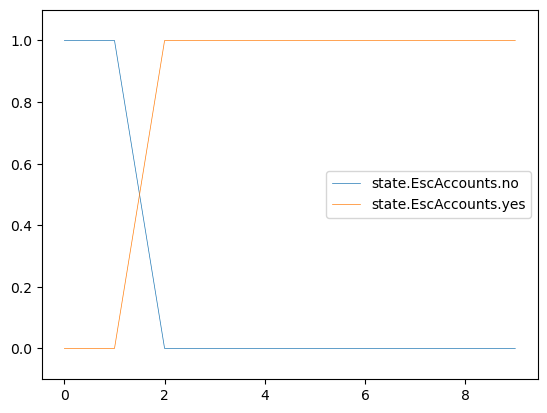

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0  RestrictAccPrivs   
1                     1.0                      0.0      DecoyAccount   
2                     0.0                      1.0      LockAccounts   
3                     0.0                      1.0           LogIOCs   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1   EnumAccounts                             none  
2           Exit                             none  
3            Nop                             none  
4            Nop                   login_activity  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

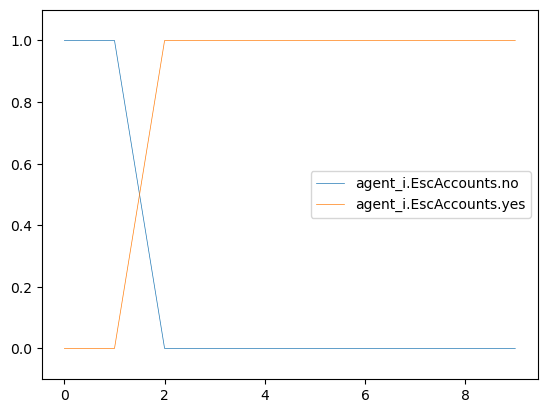

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000   EnumAccounts   
1                0.725806                 0.274194   EnumAccounts   
2                0.891285                 0.108715           Exit   
3                0.890369                 0.109631            Nop   
4                0.890369                 0.109631            Nop   
5                0.890369                 0.109631            Nop   
6                0.890369                 0.109631            Nop   
7                0.890369                 0.109631            Nop   
8                0.890369                 0.109631            Nop   
9                0.890369                 0.109631            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                            auth   
3           LogIOCs                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                   user_files                           failure   
3                   user_files                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           failure   
7                   user_files                           success   
8                   user_files                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

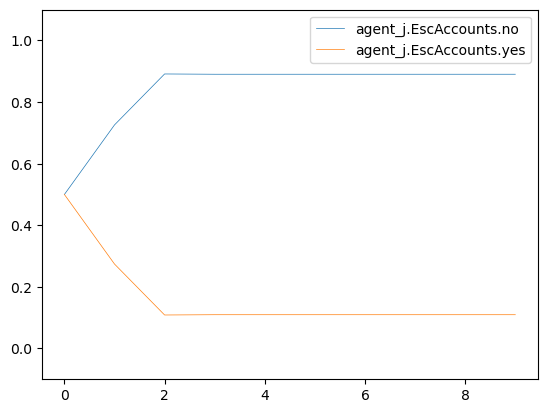

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action agent_j.action  
0                      1.0  RestrictAccPrivs   EnumAccounts  
1                      1.0      DecoyAccount   EnumAccounts  
2                      1.0      LockAccounts           Exit  
3                      1.0           LogIOCs            Nop  
4                      1.0               Nop            Nop  
5                      1.0               Nop            Nop  
6                      1.0               Nop            Nop  
7                      1.0               Nop            Nop  
8                      1.0               Nop            Nop  
9                      1.0               Nop            Nop

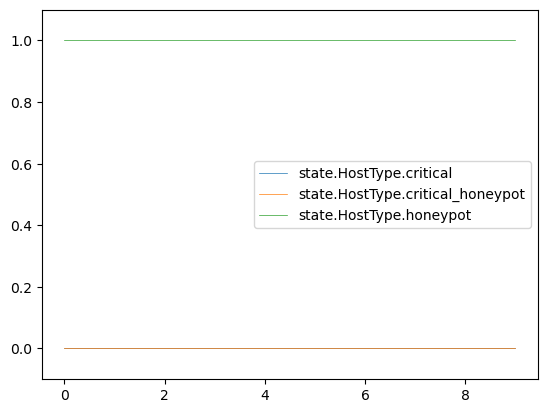

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action agent_j.action  \
0                        1.0  RestrictAccPrivs   EnumAccounts   
1                        1.0      DecoyAccount   EnumAccounts   
2                        1.0      LockAccounts           Exit   
3                        1.0           LogIOCs            Nop   
4                        1.0               Nop            Nop   
5                        1.0               Nop            Nop   
6                        1.0               Nop            Nop   
7                        1.0               Nop            Nop   
8                        1.0               Nop            Nop   
9                        1.0               Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                             none  
2                             none  
3                             none  
4                   login_activity  
5                             none  
6                             none  
7                             none  
8                        file_enum  
9                             none

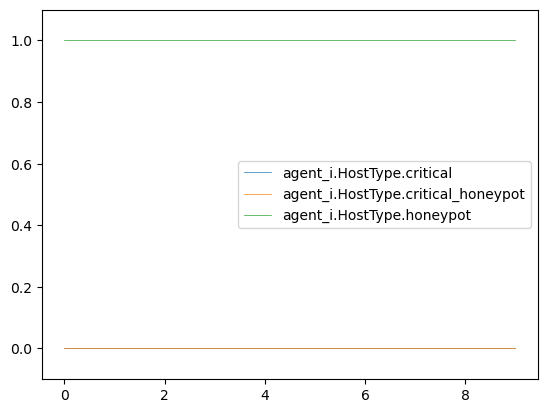

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot agent_j.action    agent_i.action  \
0                        0.0   EnumAccounts  RestrictAccPrivs   
1                        0.0   EnumAccounts      DecoyAccount   
2                        0.0           Exit      LockAccounts   
3                        0.0            Nop           LogIOCs   
4                        0.0            Nop               Nop   
5                        0.0            Nop               Nop   
6                        0.0            Nop               Nop   
7                        0.0            Nop               Nop   
8                        0.0            Nop               Nop   
9                        0.0            Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                         none   
2                            auth                   user_files   
3                            auth                   user_files   
4                          denied                   user_files   
5                            auth                         none   
6                          denied                   user_files   
7                          denied                   user_files   
8                          denied                   user_files   
9                          denied                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                      terminated   
3                           success                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           failure                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

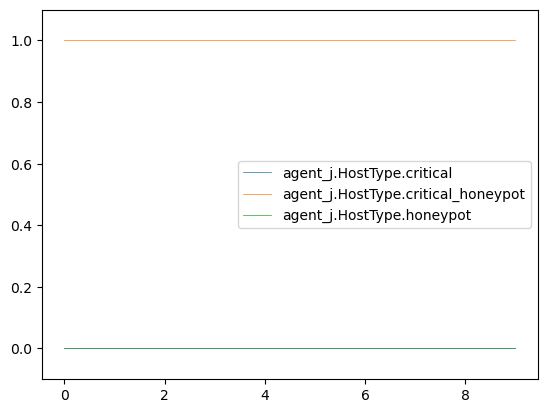

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     0.0                     1.0      DecoyAccount   
2                     0.0                     1.0      LockAccounts   
3                     0.0                     1.0           LogIOCs   
4                     0.0                     1.0               Nop   
5                     0.0                     1.0               Nop   
6                     0.0                     1.0               Nop   
7                     0.0                     1.0               Nop   
8                     0.0                     1.0               Nop   
9                     0.0                     1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2           Exit  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

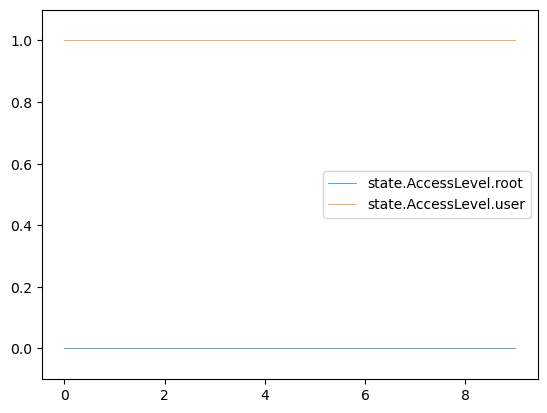

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000  RestrictAccPrivs   
1                  0.000000                  1.000000      DecoyAccount   
2                  0.000000                  1.000000      LockAccounts   
3                  0.000000                  1.000000           LogIOCs   
4                  0.010451                  0.989549               Nop   
5                  0.010451                  0.989549               Nop   
6                  0.001599                  0.998401               Nop   
7                  0.001042                  0.998958               Nop   
8                  0.001012                  0.998988               Nop   
9                  0.001014                  0.998986               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1   EnumAccounts                             none  
2           Exit                             none  
3            Nop                             none  
4            Nop                   login_activity  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

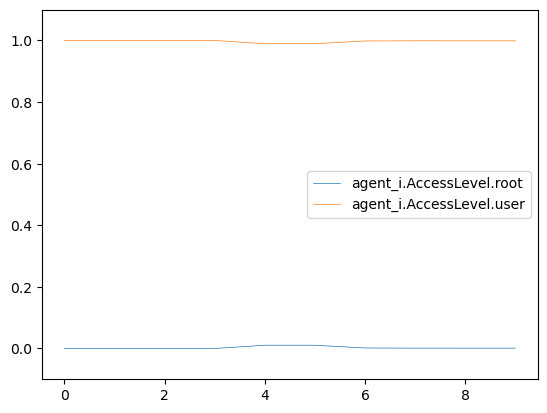

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0   EnumAccounts   
1                       0.0                       1.0   EnumAccounts   
2                       0.0                       1.0           Exit   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                            auth   
3           LogIOCs                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                   user_files                           failure   
3                   user_files                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           failure   
7                   user_files                           success   
8                   user_files                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

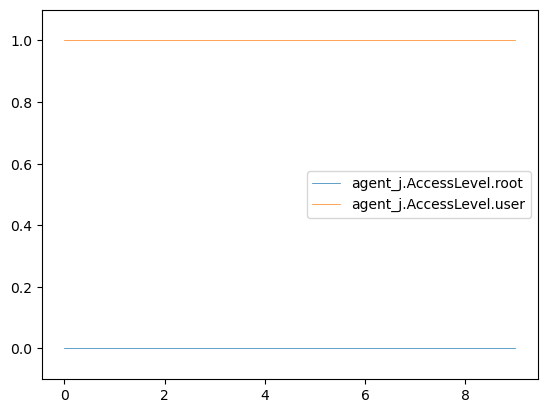

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action agent_j.action
0                 0.0                  1.0  RestrictAccPrivs   EnumAccounts
1                 0.0                  1.0      DecoyAccount   EnumAccounts
2                 0.0                  1.0      LockAccounts           Exit
3                 1.0                  0.0           LogIOCs            Nop
4                 1.0                  0.0               Nop            Nop
5                 1.0                  0.0               Nop            Nop
6                 1.0                  0.0               Nop            Nop
7                 1.0                  0.0               Nop            Nop
8                 1.0                  0.0               Nop            Nop
9                 1.0                  0.0               Nop            Nop

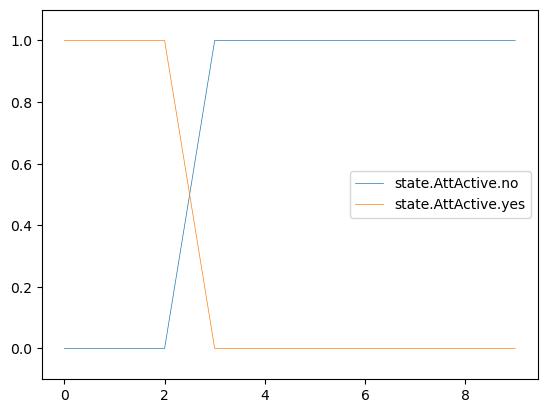

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.000000               1.000000  RestrictAccPrivs   
1              0.000000               1.000000      DecoyAccount   
2              0.415625               0.584375      LockAccounts   
3              0.917038               0.082962           LogIOCs   
4              0.988440               0.011560               Nop   
5              0.988545               0.011455               Nop   
6              0.998397               0.001603               Nop   
7              0.999907               0.000093               Nop   
8              0.999995               0.000005               Nop   
9              0.999998               0.000002               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                             none  
1   EnumAccounts                             none  
2           Exit                             none  
3            Nop                             none  
4            Nop                   login_activity  
5            Nop                             none  
6            Nop                             none  
7            Nop                             none  
8            Nop                        file_enum  
9            Nop                             none

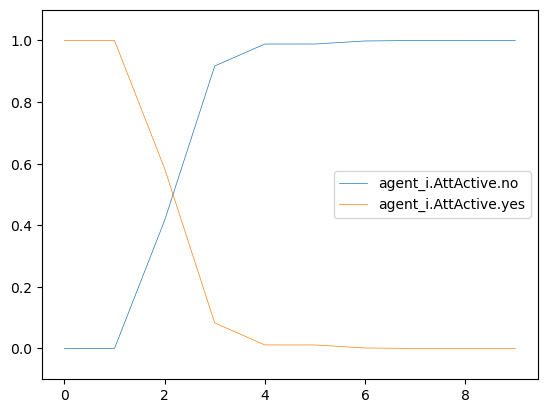

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  \
0                   0.0                    1.0   EnumAccounts   
1                   0.0                    1.0   EnumAccounts   
2                   0.0                    1.0           Exit   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                            auth   
3           LogIOCs                            auth   
4               Nop                          denied   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                   user_files                           failure   
3                   user_files                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           failure   
7                   user_files                           success   
8                   user_files                           failure   
9                         none                           failure   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

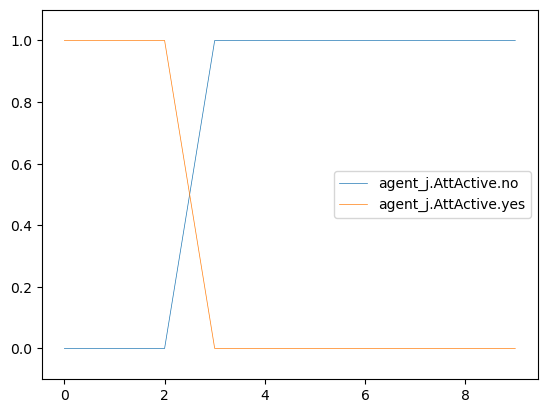

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                             none
2                               1.0                       file_write
3                               1.0                             none
4                               1.0                             none
5                               1.0                             none
6                               1.0                             none
7                               1.0                        file_enum
8                               1.0                        file_enum
9                               1.0                             none

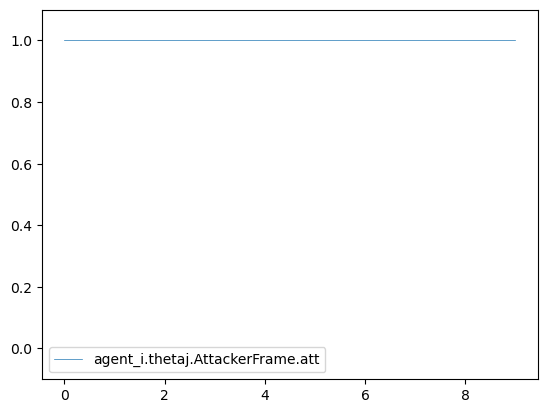

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.904762                        0.095238   
2                         0.904762                        0.095238   
3                         0.904762                        0.095238   
4                         0.904762                        0.095238   
5                         0.904762                        0.095238   
6                         0.904762                        0.095238   
7                         0.904762                        0.095238   
8                         0.904762                        0.095238   
9                         0.904762                        0.095238   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                         none   
2                          denied                         none   
3                            auth                         none   
4                            auth                         none   
5                            auth                   user_files   
6                          denied                         none   
7                          denied                         none   
8                          denied                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

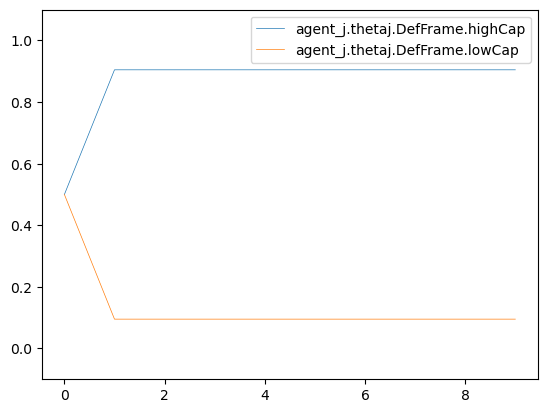

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   0.0                    1.0  RestrictAccPrivs   
1                   0.0                    1.0      DecoyAccount   
2                   0.0                    1.0      LockAccounts   
3                   0.0                    1.0           LogIOCs   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

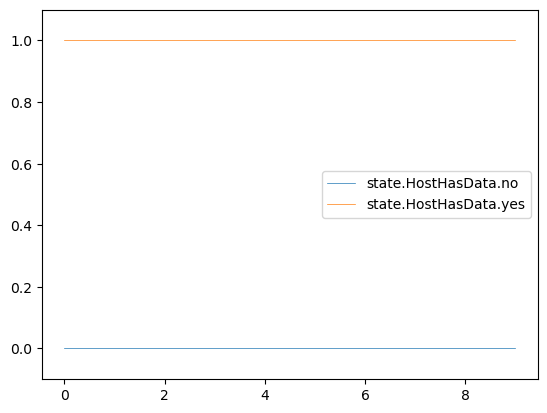

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     0.0                      1.0  RestrictAccPrivs   
1                     0.0                      1.0      DecoyAccount   
2                     0.0                      1.0      LockAccounts   
3                     0.0                      1.0           LogIOCs   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                       file_write  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                        file_enum  
9            Nop                             none

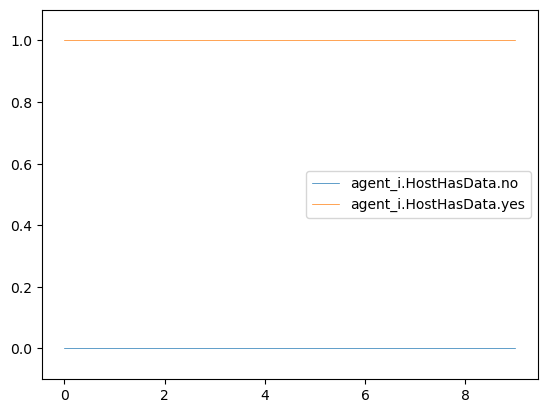

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.5                      0.5   EnumAccounts   
1                     0.5                      0.5           Exit   
2                     0.5                      0.5            Nop   
3                     0.5                      0.5            Nop   
4                     0.5                      0.5            Nop   
5                     0.5                      0.5            Nop   
6                     0.5                      0.5            Nop   
7                     0.5                      0.5            Nop   
8                     0.5                      0.5            Nop   
9                     0.5                      0.5            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                          denied   
3           LogIOCs                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           success   
3                         none                           failure   
4                         none                           success   
5                   user_files                           success   
6                         none                           failure   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

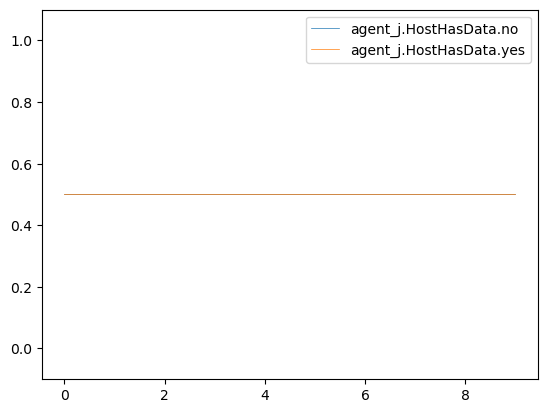

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action agent_j.action
0                 1.0                  0.0  RestrictAccPrivs   EnumAccounts
1                 1.0                  0.0      DecoyAccount           Exit
2                 1.0                  0.0      LockAccounts            Nop
3                 1.0                  0.0           LogIOCs            Nop
4                 1.0                  0.0               Nop            Nop
5                 1.0                  0.0               Nop            Nop
6                 1.0                  0.0               Nop            Nop
7                 1.0                  0.0               Nop            Nop
8                 1.0                  0.0               Nop            Nop
9                 1.0                  0.0               Nop            Nop

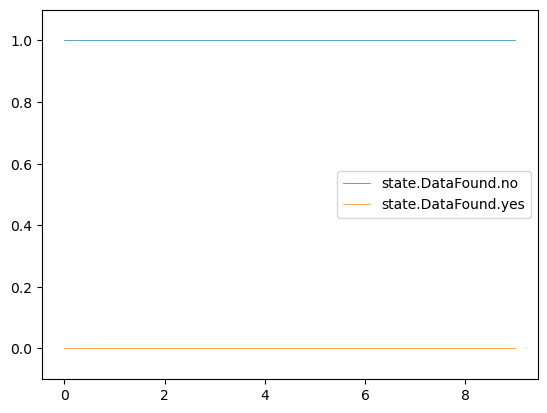

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000  RestrictAccPrivs   
1              1.000000               0.000000      DecoyAccount   
2              1.000000               0.000000      LockAccounts   
3              1.000000               0.000000           LogIOCs   
4              1.000000               0.000000               Nop   
5              0.993015               0.006985               Nop   
6              0.998706               0.001294               Nop   
7              0.999016               0.000984               Nop   
8              0.998977               0.001023               Nop   
9              0.998927               0.001073               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                       file_write  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                        file_enum  
9            Nop                             none

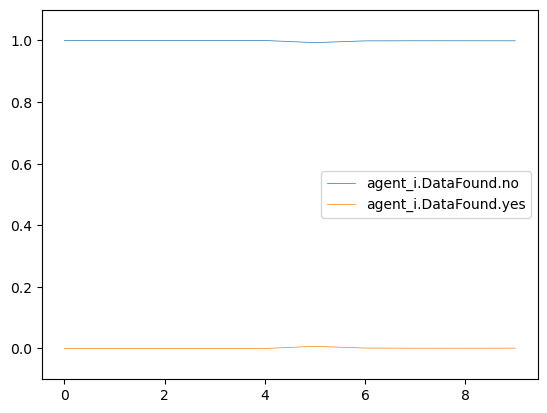

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  \
0                   1.0                    0.0   EnumAccounts   
1                   1.0                    0.0           Exit   
2                   1.0                    0.0            Nop   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                          denied   
3           LogIOCs                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           success   
3                         none                           failure   
4                         none                           success   
5                   user_files                           success   
6                         none                           failure   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

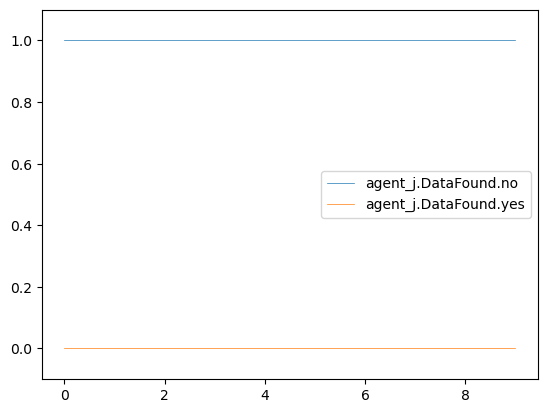

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0      LockAccounts   
3                    1.0                     0.0           LogIOCs   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    1.0                     0.0               Nop   
7                    1.0                     0.0               Nop   
8                    1.0                     0.0               Nop   
9                    1.0                     0.0               Nop   

  agent_j.action  
0   EnumAccounts  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

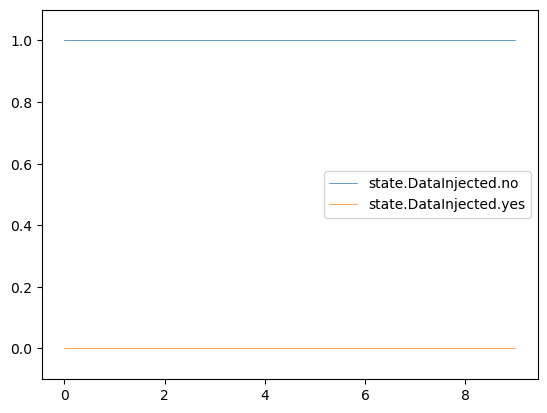

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000  RestrictAccPrivs   
1                 1.000000                  0.000000      DecoyAccount   
2                 1.000000                  0.000000      LockAccounts   
3                 1.000000                  0.000000           LogIOCs   
4                 1.000000                  0.000000               Nop   
5                 1.000000                  0.000000               Nop   
6                 0.999094                  0.000906               Nop   
7                 0.999044                  0.000956               Nop   
8                 0.999019                  0.000981               Nop   
9                 0.998982                  0.001018               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                       file_write  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                        file_enum  
9            Nop                             none

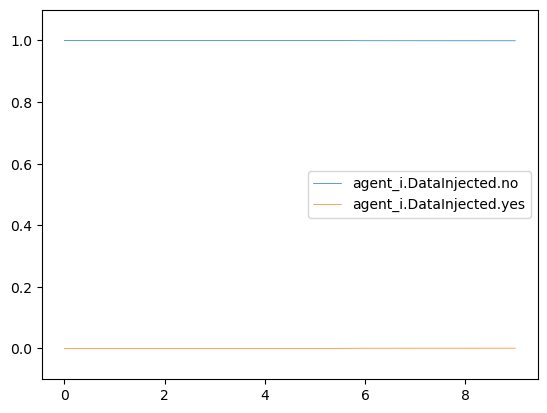

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0   EnumAccounts   
1                      1.0                       0.0           Exit   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                          denied   
3           LogIOCs                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           success   
3                         none                           failure   
4                         none                           success   
5                   user_files                           success   
6                         none                           failure   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

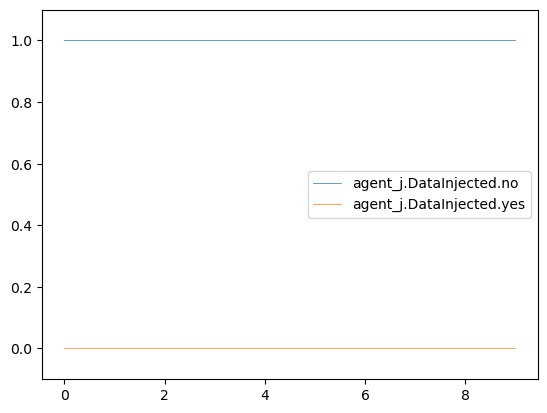

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action agent_j.action
0                   0.0                   1.0  RestrictAccPrivs   EnumAccounts
1                   1.0                   0.0      DecoyAccount           Exit
2                   1.0                   0.0      LockAccounts            Nop
3                   1.0                   0.0           LogIOCs            Nop
4                   1.0                   0.0               Nop            Nop
5                   1.0                   0.0               Nop            Nop
6                   1.0                   0.0               Nop            Nop
7                   1.0                   0.0               Nop            Nop
8                   1.0                   0.0               Nop            Nop
9                   1.0                   0.0               Nop            Nop

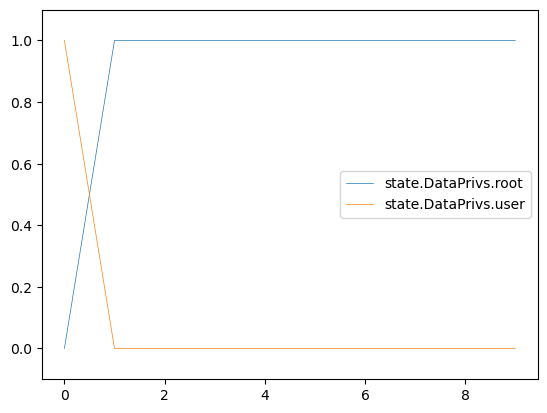

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     1.0                     0.0      DecoyAccount   
2                     1.0                     0.0      LockAccounts   
3                     1.0                     0.0           LogIOCs   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                       file_write  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                        file_enum  
9            Nop                             none

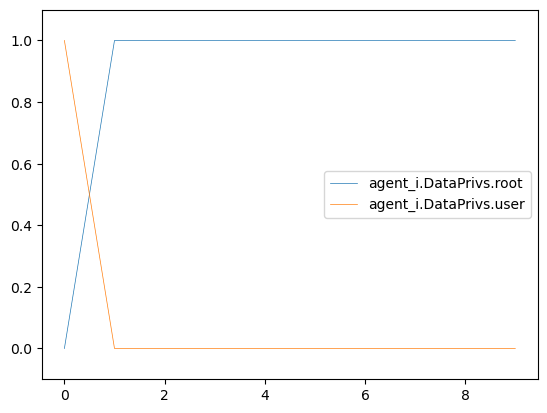

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000   EnumAccounts   
1                0.571429                0.428571           Exit   
2                1.000000                0.000000            Nop   
3                1.000000                0.000000            Nop   
4                1.000000                0.000000            Nop   
5                1.000000                0.000000            Nop   
6                1.000000                0.000000            Nop   
7                1.000000                0.000000            Nop   
8                1.000000                0.000000            Nop   
9                1.000000                0.000000            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                          denied   
3           LogIOCs                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           success   
3                         none                           failure   
4                         none                           success   
5                   user_files                           success   
6                         none                           failure   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

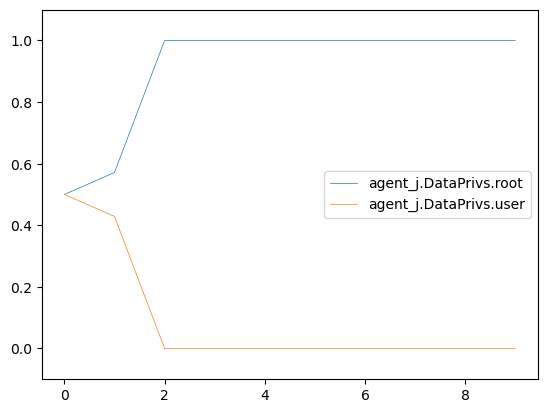

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action agent_j.action
0                1.0                 0.0  RestrictAccPrivs   EnumAccounts
1                1.0                 0.0      DecoyAccount           Exit
2                1.0                 0.0      LockAccounts            Nop
3                1.0                 0.0           LogIOCs            Nop
4                1.0                 0.0               Nop            Nop
5                1.0                 0.0               Nop            Nop
6                1.0                 0.0               Nop            Nop
7                1.0                 0.0               Nop            Nop
8                1.0                 0.0               Nop            Nop
9                1.0                 0.0               Nop            Nop

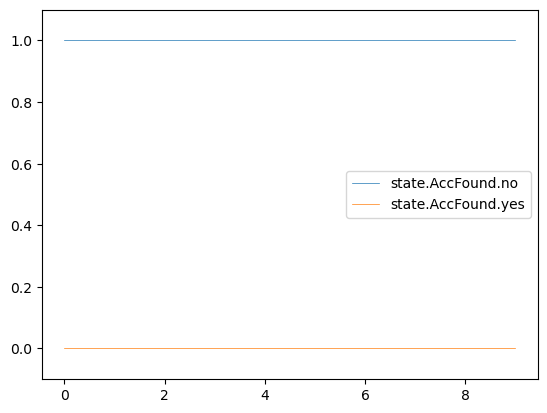

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action agent_j.action  \
0             1.000000              0.000000  RestrictAccPrivs   EnumAccounts   
1             1.000000              0.000000      DecoyAccount           Exit   
2             0.645625              0.354375      LockAccounts            Nop   
3             0.610188              0.389812           LogIOCs            Nop   
4             0.833892              0.166108               Nop            Nop   
5             0.882190              0.117810               Nop            Nop   
6             0.890262              0.109738               Nop            Nop   
7             0.890736              0.109264               Nop            Nop   
8             0.890696              0.109304               Nop            Nop   
9             0.890644              0.109356               Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                       file_write  
3                             none  
4                             none  
5                             none  
6                             none  
7                        file_enum  
8                        file_enum  
9                             none

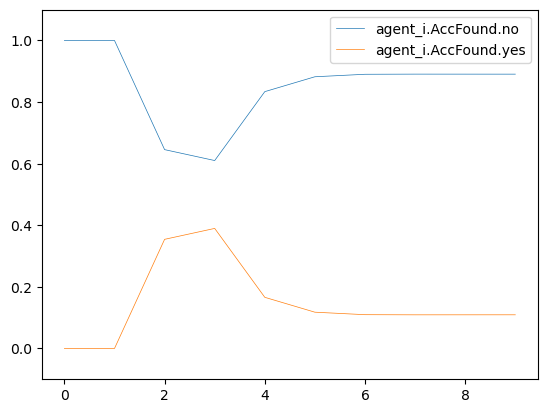

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action    agent_i.action  \
0             1.000000              0.000000   EnumAccounts  RestrictAccPrivs   
1             0.943548              0.056452           Exit      DecoyAccount   
2             0.943548              0.056452            Nop      LockAccounts   
3             0.943548              0.056452            Nop           LogIOCs   
4             0.943548              0.056452            Nop               Nop   
5             0.943548              0.056452            Nop               Nop   
6             0.943548              0.056452            Nop               Nop   
7             0.943548              0.056452            Nop               Nop   
8             0.943548              0.056452            Nop               Nop   
9             0.943548              0.056452            Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                         none   
2                          denied                         none   
3                            auth                         none   
4                            auth                         none   
5                            auth                   user_files   
6                          denied                         none   
7                          denied                         none   
8                          denied                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

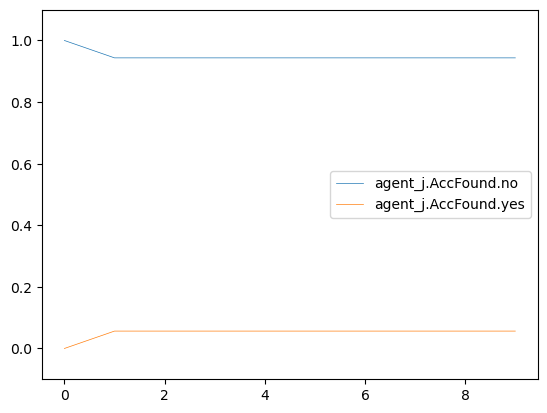

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes    agent_i.action agent_j.action
0                  1.0                   0.0  RestrictAccPrivs   EnumAccounts
1                  1.0                   0.0      DecoyAccount           Exit
2                  1.0                   0.0      LockAccounts            Nop
3                  1.0                   0.0           LogIOCs            Nop
4                  0.0                   1.0               Nop            Nop
5                  0.0                   1.0               Nop            Nop
6                  0.0                   1.0               Nop            Nop
7                  0.0                   1.0               Nop            Nop
8                  0.0                   1.0               Nop            Nop
9                  0.0                   1.0               Nop            Nop

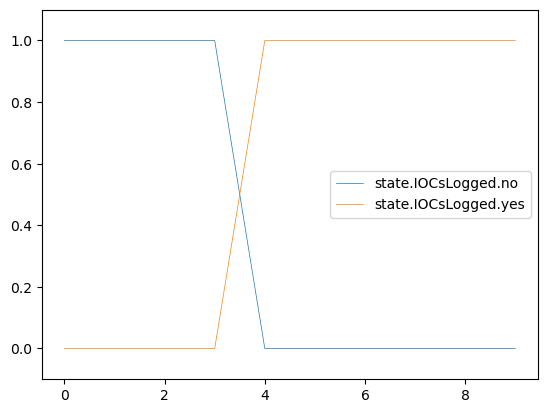

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0      LockAccounts   
3                    1.0                     0.0           LogIOCs   
4                    0.0                     1.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                       file_write  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                        file_enum  
9            Nop                             none

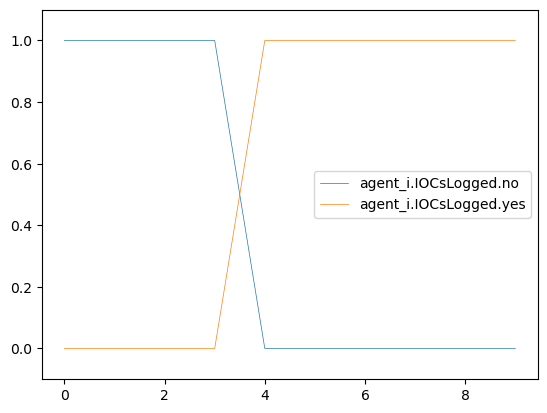

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0               1.000000                0.000000   EnumAccounts   
1               0.142857                0.857143           Exit   
2               0.142857                0.857143            Nop   
3               0.142857                0.857143            Nop   
4               0.142857                0.857143            Nop   
5               0.142857                0.857143            Nop   
6               0.142857                0.857143            Nop   
7               0.142857                0.857143            Nop   
8               0.142857                0.857143            Nop   
9               0.142857                0.857143            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                          denied   
3           LogIOCs                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           success   
3                         none                           failure   
4                         none                           success   
5                   user_files                           success   
6                         none                           failure   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

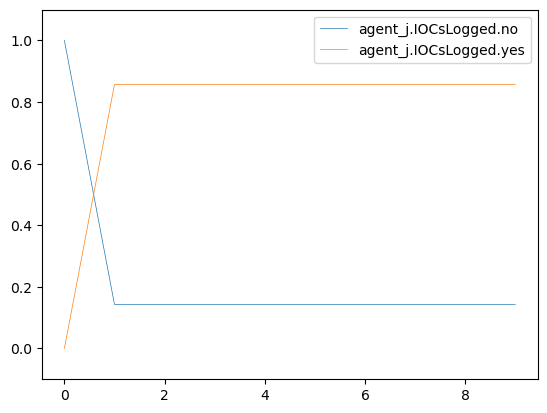

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   1.0                    0.0  RestrictAccPrivs   
1                   1.0                    0.0      DecoyAccount   
2                   0.0                    1.0      LockAccounts   
3                   0.0                    1.0           LogIOCs   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

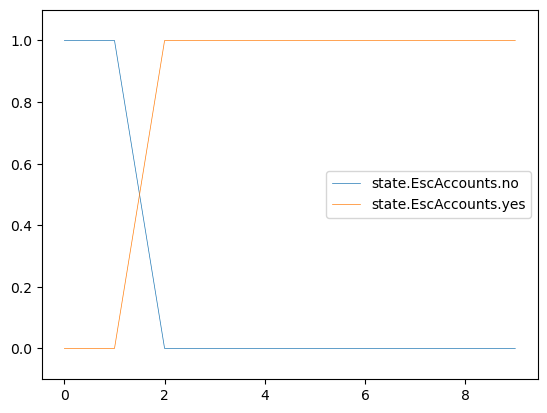

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0  RestrictAccPrivs   
1                     1.0                      0.0      DecoyAccount   
2                     0.0                      1.0      LockAccounts   
3                     0.0                      1.0           LogIOCs   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                       file_write  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                        file_enum  
9            Nop                             none

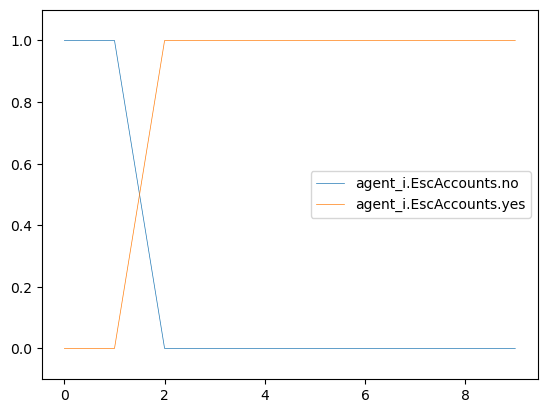

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000   EnumAccounts   
1                0.725806                 0.274194           Exit   
2                0.725806                 0.274194            Nop   
3                0.103687                 0.896313            Nop   
4                0.103687                 0.896313            Nop   
5                0.103687                 0.896313            Nop   
6                0.103687                 0.896313            Nop   
7                0.103687                 0.896313            Nop   
8                0.103687                 0.896313            Nop   
9                0.103687                 0.896313            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                          denied   
3           LogIOCs                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           success   
3                         none                           failure   
4                         none                           success   
5                   user_files                           success   
6                         none                           failure   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

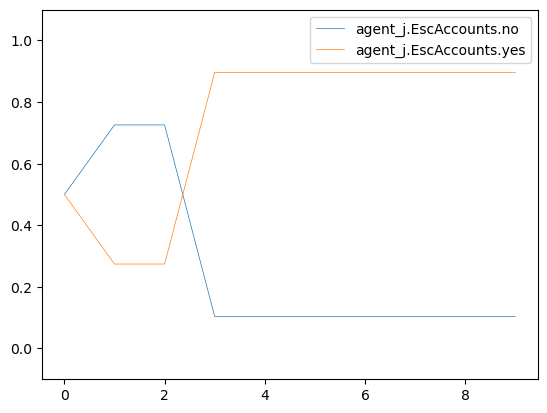

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action agent_j.action  
0                      1.0  RestrictAccPrivs   EnumAccounts  
1                      1.0      DecoyAccount           Exit  
2                      1.0      LockAccounts            Nop  
3                      1.0           LogIOCs            Nop  
4                      1.0               Nop            Nop  
5                      1.0               Nop            Nop  
6                      1.0               Nop            Nop  
7                      1.0               Nop            Nop  
8                      1.0               Nop            Nop  
9                      1.0               Nop            Nop

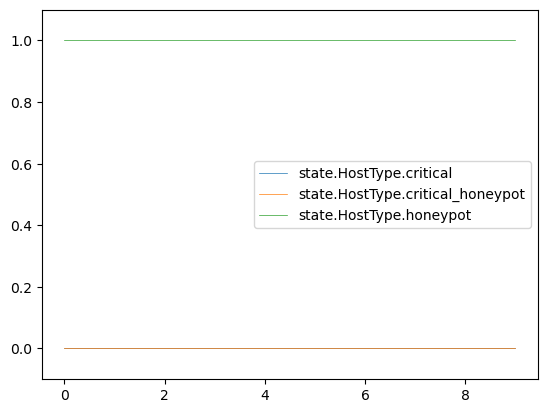

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action agent_j.action  \
0                        1.0  RestrictAccPrivs   EnumAccounts   
1                        1.0      DecoyAccount           Exit   
2                        1.0      LockAccounts            Nop   
3                        1.0           LogIOCs            Nop   
4                        1.0               Nop            Nop   
5                        1.0               Nop            Nop   
6                        1.0               Nop            Nop   
7                        1.0               Nop            Nop   
8                        1.0               Nop            Nop   
9                        1.0               Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                             none  
2                       file_write  
3                             none  
4                             none  
5                             none  
6                             none  
7                        file_enum  
8                        file_enum  
9                             none

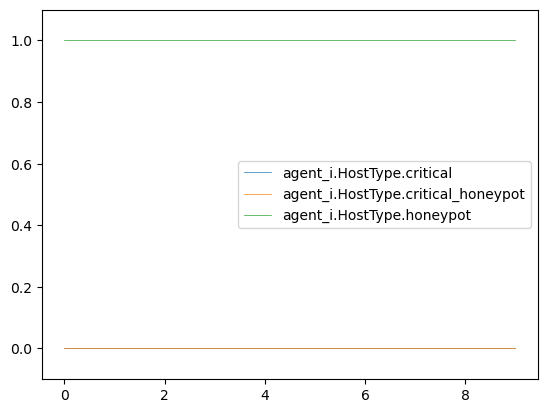

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot agent_j.action    agent_i.action  \
0                        0.0   EnumAccounts  RestrictAccPrivs   
1                        0.0           Exit      DecoyAccount   
2                        0.0            Nop      LockAccounts   
3                        0.0            Nop           LogIOCs   
4                        0.0            Nop               Nop   
5                        0.0            Nop               Nop   
6                        0.0            Nop               Nop   
7                        0.0            Nop               Nop   
8                        0.0            Nop               Nop   
9                        0.0            Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                         none   
2                          denied                         none   
3                            auth                         none   
4                            auth                         none   
5                            auth                   user_files   
6                          denied                         none   
7                          denied                         none   
8                          denied                   user_files   
9                          denied                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                      terminated   
2                           success                      terminated   
3                           failure                      terminated   
4                           success                      terminated   
5                           success                      terminated   
6                           failure                      terminated   
7                           success                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

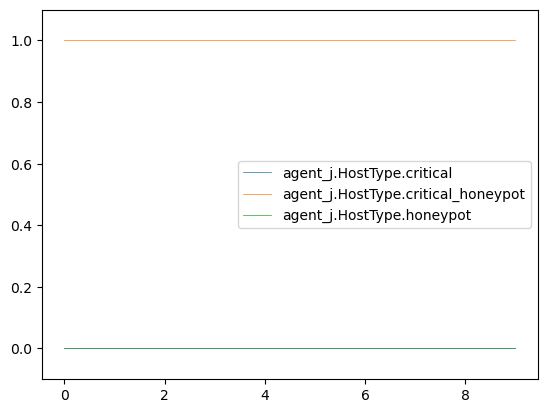

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     0.0                     1.0      DecoyAccount   
2                     0.0                     1.0      LockAccounts   
3                     0.0                     1.0           LogIOCs   
4                     0.0                     1.0               Nop   
5                     0.0                     1.0               Nop   
6                     0.0                     1.0               Nop   
7                     0.0                     1.0               Nop   
8                     0.0                     1.0               Nop   
9                     0.0                     1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1           Exit  
2            Nop  
3            Nop  
4            Nop  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

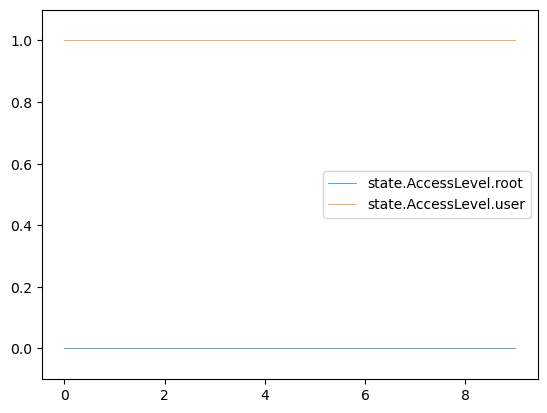

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000  RestrictAccPrivs   
1                  0.000000                  1.000000      DecoyAccount   
2                  0.000000                  1.000000      LockAccounts   
3                  0.000000                  1.000000           LogIOCs   
4                  0.065546                  0.934454               Nop   
5                  0.009978                  0.990022               Nop   
6                  0.001526                  0.998474               Nop   
7                  0.000995                  0.999005               Nop   
8                  0.001040                  0.998960               Nop   
9                  0.001098                  0.998902               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                       file_write  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                        file_enum  
9            Nop                             none

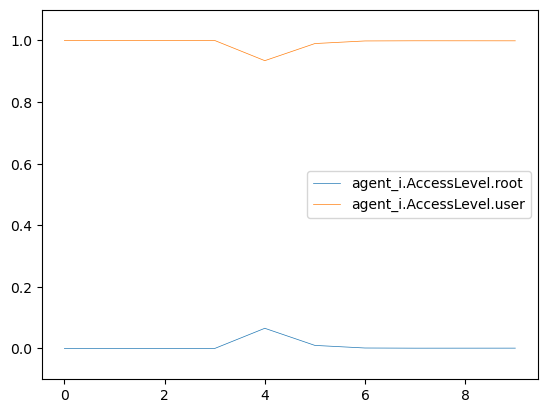

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0   EnumAccounts   
1                       0.0                       1.0           Exit   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                          denied   
3           LogIOCs                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           success   
3                         none                           failure   
4                         none                           success   
5                   user_files                           success   
6                         none                           failure   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

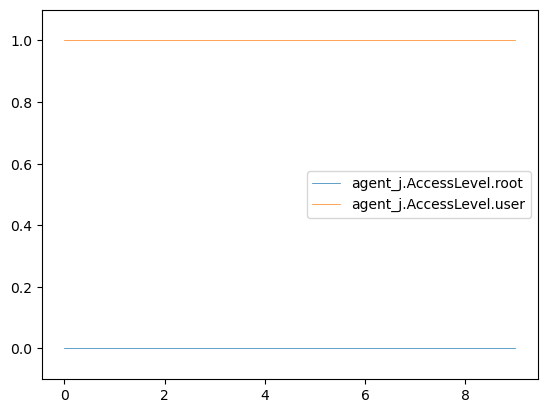

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action agent_j.action
0                 0.0                  1.0  RestrictAccPrivs   EnumAccounts
1                 0.0                  1.0      DecoyAccount           Exit
2                 1.0                  0.0      LockAccounts            Nop
3                 1.0                  0.0           LogIOCs            Nop
4                 1.0                  0.0               Nop            Nop
5                 1.0                  0.0               Nop            Nop
6                 1.0                  0.0               Nop            Nop
7                 1.0                  0.0               Nop            Nop
8                 1.0                  0.0               Nop            Nop
9                 1.0                  0.0               Nop            Nop

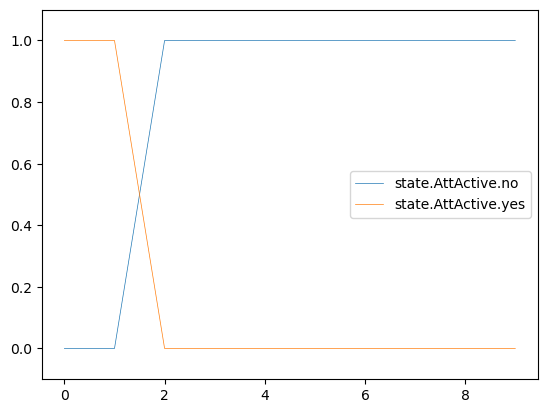

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.000000               1.000000  RestrictAccPrivs   
1              0.000000               1.000000      DecoyAccount   
2              0.415625               0.584375      LockAccounts   
3              0.612269               0.387731           LogIOCs   
4              0.927499               0.072501               Nop   
5              0.989064               0.010936               Nop   
6              0.998470               0.001530               Nop   
7              0.999911               0.000089               Nop   
8              0.999921               0.000079               Nop   
9              0.999895               0.000105               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1           Exit                             none  
2            Nop                       file_write  
3            Nop                             none  
4            Nop                             none  
5            Nop                             none  
6            Nop                             none  
7            Nop                        file_enum  
8            Nop                        file_enum  
9            Nop                             none

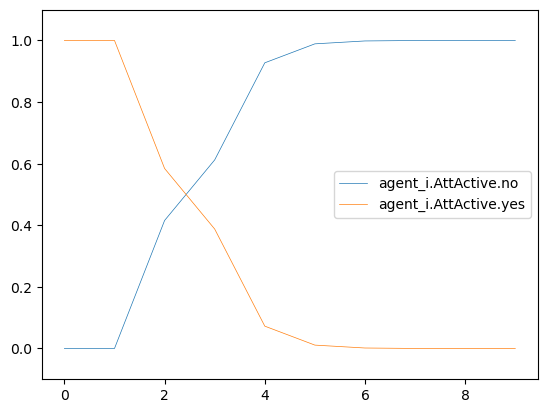

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  \
0                   0.0                    1.0   EnumAccounts   
1                   0.0                    1.0           Exit   
2                   1.0                    0.0            Nop   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                          denied   
3           LogIOCs                            auth   
4               Nop                            auth   
5               Nop                            auth   
6               Nop                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                          denied   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           failure   
2                         none                           success   
3                         none                           failure   
4                         none                           success   
5                   user_files                           success   
6                         none                           failure   
7                         none                           success   
8                   user_files                           failure   
9                   user_files                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                            none  
1                      terminated                            none  
2                      terminated                            none  
3                      terminated                            none  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

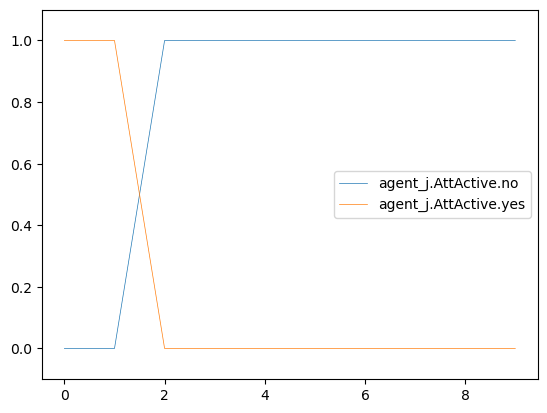

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                       file_write
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

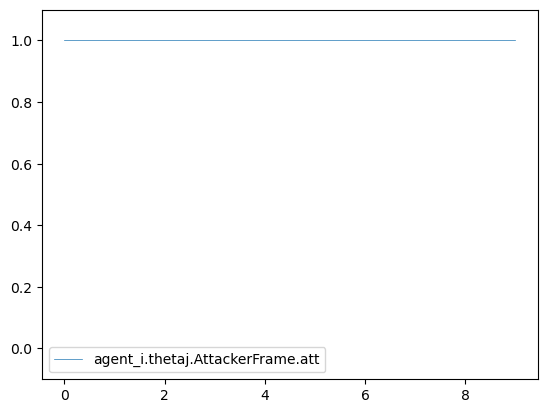

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.345454                        0.654545   
2                         0.334019                        0.665982   
3                         0.968140                        0.031860   
4                         0.900015                        0.099985   
5                         0.900015                        0.099985   
6                         0.900015                        0.099985   
7                         0.900015                        0.099985   
8                         0.900015                        0.099985   
9                         0.900015                        0.099985   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                         none   
2                          denied                   user_files   
3                          denied                         none   
4                            auth                         none   
5                          denied                   user_files   
6                            auth                         none   
7                          denied                   user_files   
8                            auth                   user_files   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           success                          active   
4                           failure                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

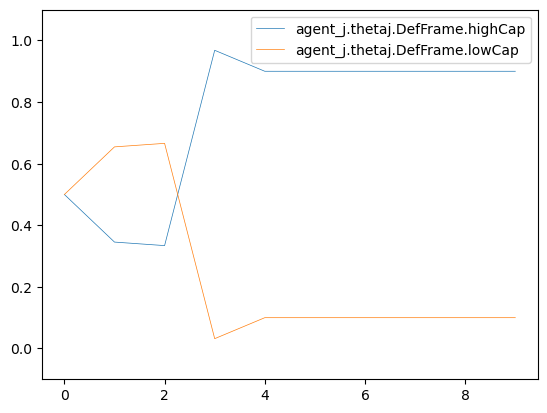

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   0.0                    1.0  RestrictAccPrivs   
1                   0.0                    1.0      DecoyAccount   
2                   0.0                    1.0      LockAccounts   
3                   0.0                    1.0      LockAccounts   
4                   0.0                    1.0           LogIOCs   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2     PrivEscAcc  
3     PrivEscAcc  
4           Exit  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

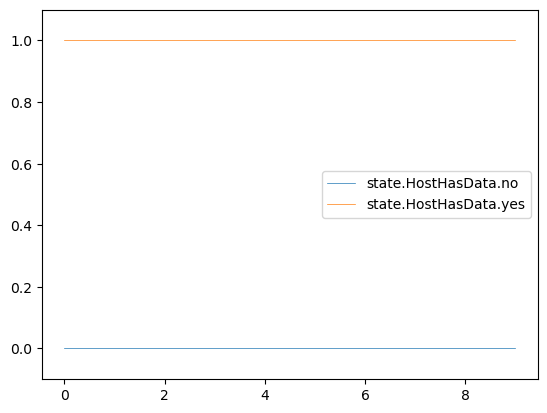

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     0.0                      1.0  RestrictAccPrivs   
1                     0.0                      1.0      DecoyAccount   
2                     0.0                      1.0      LockAccounts   
3                     0.0                      1.0      LockAccounts   
4                     0.0                      1.0           LogIOCs   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3     PrivEscAcc                        file_enum  
4           Exit                       file_write  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

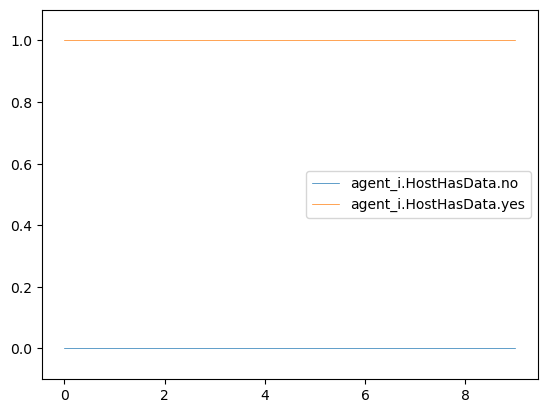

agent_j.HostHasData.no  agent_j.HostHasData.yes agent_j.action  \
0                     0.5                      0.5   EnumAccounts   
1                     0.5                      0.5   EnumAccounts   
2                     0.5                      0.5     PrivEscAcc   
3                     0.5                      0.5     PrivEscAcc   
4                     0.5                      0.5           Exit   
5                     0.5                      0.5            Nop   
6                     0.5                      0.5            Nop   
7                     0.5                      0.5            Nop   
8                     0.5                      0.5            Nop   
9                     0.5                      0.5            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                          denied   
3      LockAccounts                          denied   
4           LogIOCs                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                         none                           failure   
5                   user_files                           success   
6                         none                           success   
7                   user_files                           failure   
8                   user_files                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active               acc_policy_change  
3                          active               acc_policy_change  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

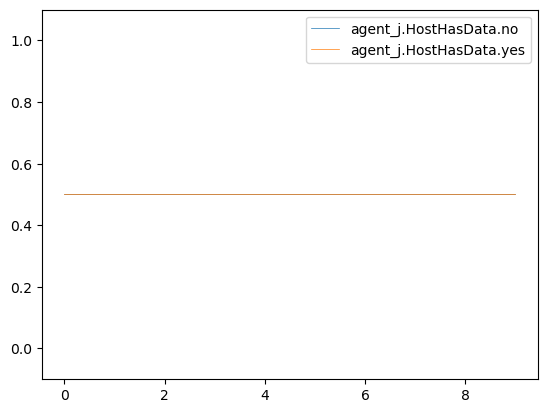

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action agent_j.action
0                 1.0                  0.0  RestrictAccPrivs   EnumAccounts
1                 1.0                  0.0      DecoyAccount   EnumAccounts
2                 1.0                  0.0      LockAccounts     PrivEscAcc
3                 1.0                  0.0      LockAccounts     PrivEscAcc
4                 1.0                  0.0           LogIOCs           Exit
5                 1.0                  0.0               Nop            Nop
6                 1.0                  0.0               Nop            Nop
7                 1.0                  0.0               Nop            Nop
8                 1.0                  0.0               Nop            Nop
9                 1.0                  0.0               Nop            Nop

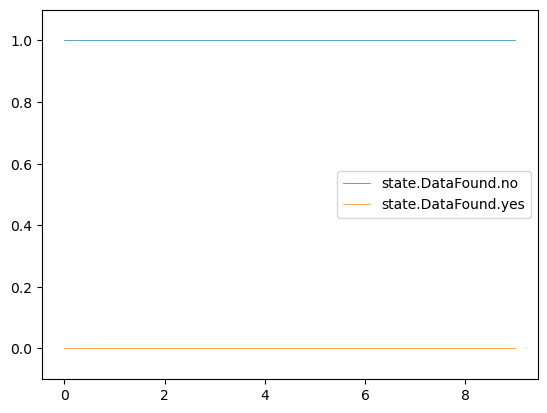

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000  RestrictAccPrivs   
1              1.000000               0.000000      DecoyAccount   
2              1.000000               0.000000      LockAccounts   
3              1.000000               0.000000      LockAccounts   
4              1.000000               0.000000           LogIOCs   
5              1.000000               0.000000               Nop   
6              1.000000               0.000000               Nop   
7              0.803612               0.196388               Nop   
8              0.952535               0.047465               Nop   
9              0.963635               0.036365               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3     PrivEscAcc                        file_enum  
4           Exit                       file_write  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

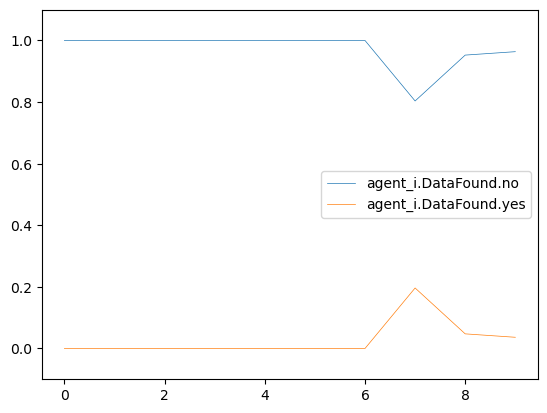

agent_j.DataFound.no  agent_j.DataFound.yes agent_j.action  \
0                   1.0                    0.0   EnumAccounts   
1                   1.0                    0.0   EnumAccounts   
2                   1.0                    0.0     PrivEscAcc   
3                   1.0                    0.0     PrivEscAcc   
4                   1.0                    0.0           Exit   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                          denied   
3      LockAccounts                          denied   
4           LogIOCs                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                         none                           failure   
5                   user_files                           success   
6                         none                           success   
7                   user_files                           failure   
8                   user_files                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active               acc_policy_change  
3                          active               acc_policy_change  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

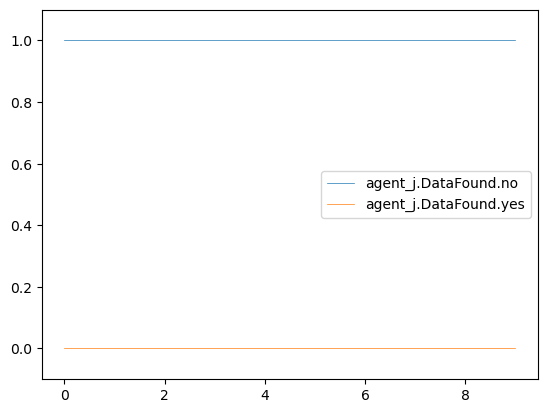

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0      LockAccounts   
3                    1.0                     0.0      LockAccounts   
4                    1.0                     0.0           LogIOCs   
5                    1.0                     0.0               Nop   
6                    1.0                     0.0               Nop   
7                    1.0                     0.0               Nop   
8                    1.0                     0.0               Nop   
9                    1.0                     0.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2     PrivEscAcc  
3     PrivEscAcc  
4           Exit  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

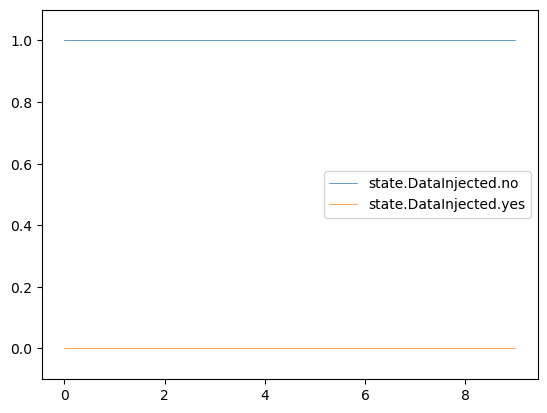

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000  RestrictAccPrivs   
1                 1.000000                  0.000000      DecoyAccount   
2                 1.000000                  0.000000      LockAccounts   
3                 1.000000                  0.000000      LockAccounts   
4                 1.000000                  0.000000           LogIOCs   
5                 1.000000                  0.000000               Nop   
6                 1.000000                  0.000000               Nop   
7                 1.000000                  0.000000               Nop   
8                 0.966756                  0.033244               Nop   
9                 0.964358                  0.035642               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3     PrivEscAcc                        file_enum  
4           Exit                       file_write  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

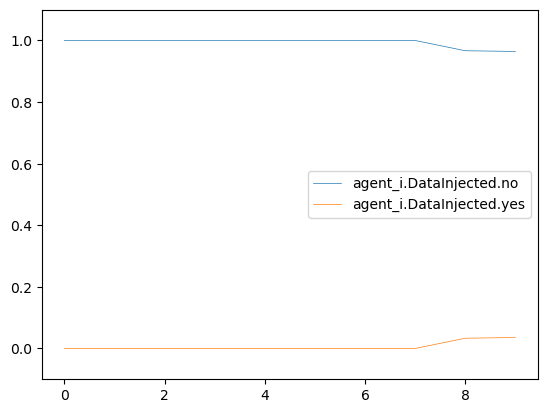

agent_j.DataInjected.no  agent_j.DataInjected.yes agent_j.action  \
0                      1.0                       0.0   EnumAccounts   
1                      1.0                       0.0   EnumAccounts   
2                      1.0                       0.0     PrivEscAcc   
3                      1.0                       0.0     PrivEscAcc   
4                      1.0                       0.0           Exit   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0            Nop   
7                      1.0                       0.0            Nop   
8                      1.0                       0.0            Nop   
9                      1.0                       0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                          denied   
3      LockAccounts                          denied   
4           LogIOCs                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                         none                           failure   
5                   user_files                           success   
6                         none                           success   
7                   user_files                           failure   
8                   user_files                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active               acc_policy_change  
3                          active               acc_policy_change  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

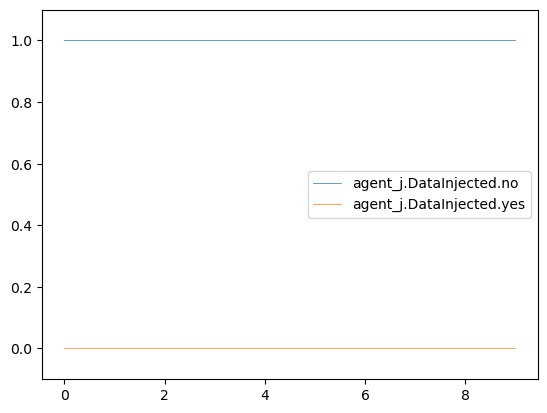

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action agent_j.action
0                   0.0                   1.0  RestrictAccPrivs   EnumAccounts
1                   1.0                   0.0      DecoyAccount   EnumAccounts
2                   1.0                   0.0      LockAccounts     PrivEscAcc
3                   1.0                   0.0      LockAccounts     PrivEscAcc
4                   1.0                   0.0           LogIOCs           Exit
5                   1.0                   0.0               Nop            Nop
6                   1.0                   0.0               Nop            Nop
7                   1.0                   0.0               Nop            Nop
8                   1.0                   0.0               Nop            Nop
9                   1.0                   0.0               Nop            Nop

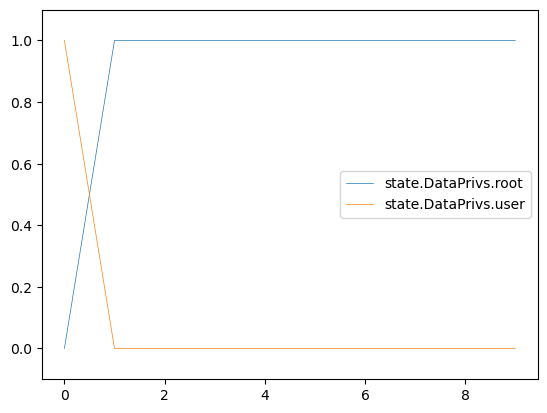

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     1.0                     0.0      DecoyAccount   
2                     1.0                     0.0      LockAccounts   
3                     1.0                     0.0      LockAccounts   
4                     1.0                     0.0           LogIOCs   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3     PrivEscAcc                        file_enum  
4           Exit                       file_write  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

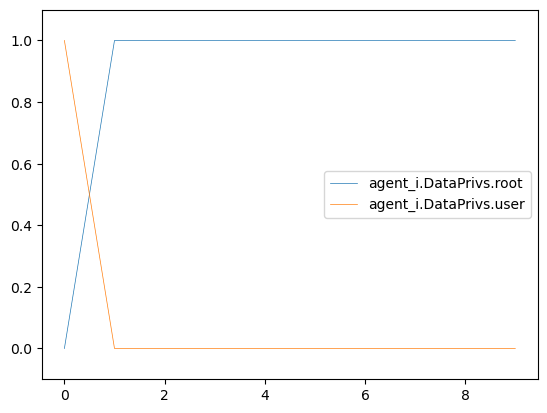

agent_j.DataPrivs.root  agent_j.DataPrivs.user agent_j.action  \
0                0.500000                0.500000   EnumAccounts   
1                0.990909                0.009091   EnumAccounts   
2                1.000000                0.000000     PrivEscAcc   
3                1.000000                0.000000     PrivEscAcc   
4                1.000000                0.000000           Exit   
5                1.000000                0.000000            Nop   
6                1.000000                0.000000            Nop   
7                1.000000                0.000000            Nop   
8                1.000000                0.000000            Nop   
9                1.000000                0.000000            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                          denied   
3      LockAccounts                          denied   
4           LogIOCs                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                         none                           failure   
5                   user_files                           success   
6                         none                           success   
7                   user_files                           failure   
8                   user_files                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active               acc_policy_change  
3                          active               acc_policy_change  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

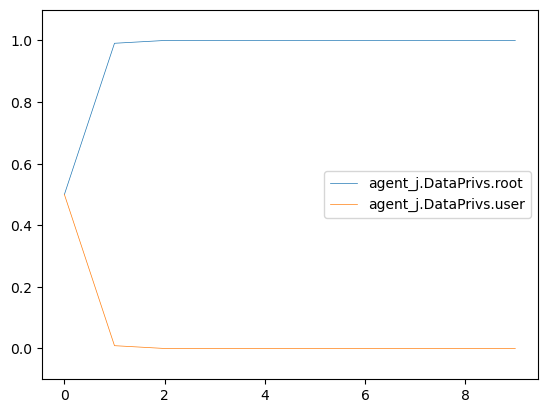

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action agent_j.action
0                1.0                 0.0  RestrictAccPrivs   EnumAccounts
1                1.0                 0.0      DecoyAccount   EnumAccounts
2                0.0                 1.0      LockAccounts     PrivEscAcc
3                0.0                 1.0      LockAccounts     PrivEscAcc
4                0.0                 1.0           LogIOCs           Exit
5                0.0                 1.0               Nop            Nop
6                0.0                 1.0               Nop            Nop
7                0.0                 1.0               Nop            Nop
8                0.0                 1.0               Nop            Nop
9                0.0                 1.0               Nop            Nop

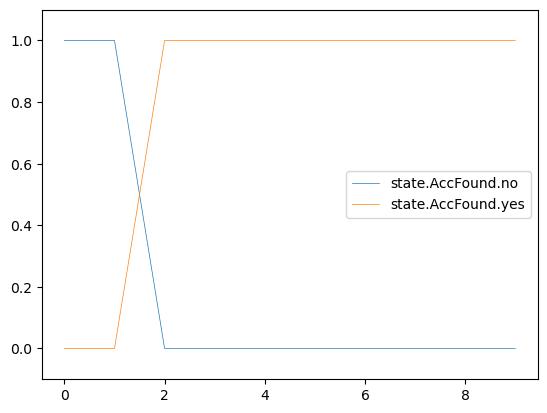

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action agent_j.action  \
0             1.000000              0.000000  RestrictAccPrivs   EnumAccounts   
1             1.000000              0.000000      DecoyAccount   EnumAccounts   
2             0.322696              0.677304      LockAccounts     PrivEscAcc   
3             0.104009              0.895991      LockAccounts     PrivEscAcc   
4             0.104009              0.895991           LogIOCs           Exit   
5             0.077097              0.922903               Nop            Nop   
6             0.204426              0.795574               Nop            Nop   
7             0.204426              0.795574               Nop            Nop   
8             0.269149              0.730851               Nop            Nop   
9             0.273738              0.726262               Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                       file_write  
7                             none  
8                             none  
9                             none

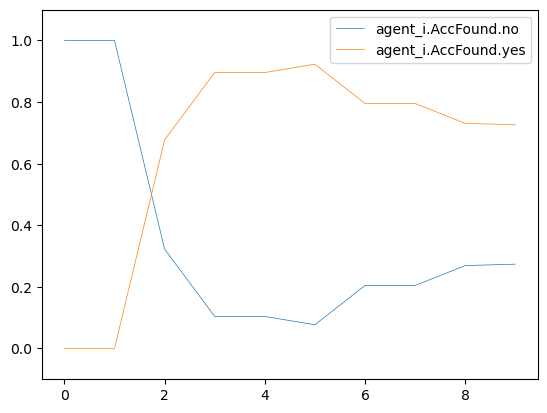

agent_j.AccFound.no  agent_j.AccFound.yes agent_j.action    agent_i.action  \
0             1.000000              0.000000   EnumAccounts  RestrictAccPrivs   
1             0.943548              0.056452   EnumAccounts      DecoyAccount   
2             0.296196              0.703804     PrivEscAcc      LockAccounts   
3             0.318654              0.681346     PrivEscAcc      LockAccounts   
4             1.000000              0.000000           Exit           LogIOCs   
5             1.000000              0.000000            Nop               Nop   
6             1.000000              0.000000            Nop               Nop   
7             1.000000              0.000000            Nop               Nop   
8             1.000000              0.000000            Nop               Nop   
9             1.000000              0.000000            Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                         none   
2                          denied                   user_files   
3                          denied                         none   
4                            auth                         none   
5                          denied                   user_files   
6                            auth                         none   
7                          denied                   user_files   
8                            auth                   user_files   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           success                          active   
4                           failure                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

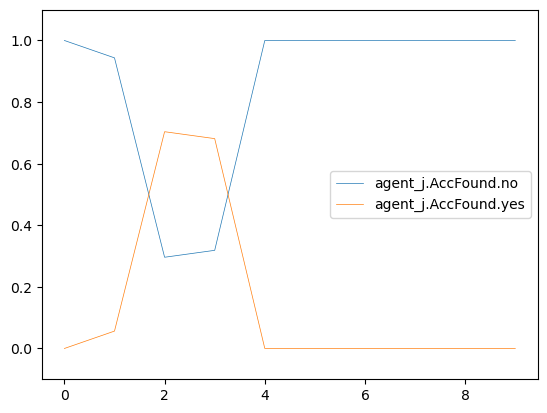

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes    agent_i.action agent_j.action
0                  1.0                   0.0  RestrictAccPrivs   EnumAccounts
1                  1.0                   0.0      DecoyAccount   EnumAccounts
2                  1.0                   0.0      LockAccounts     PrivEscAcc
3                  1.0                   0.0      LockAccounts     PrivEscAcc
4                  1.0                   0.0           LogIOCs           Exit
5                  0.0                   1.0               Nop            Nop
6                  0.0                   1.0               Nop            Nop
7                  0.0                   1.0               Nop            Nop
8                  0.0                   1.0               Nop            Nop
9                  0.0                   1.0               Nop            Nop

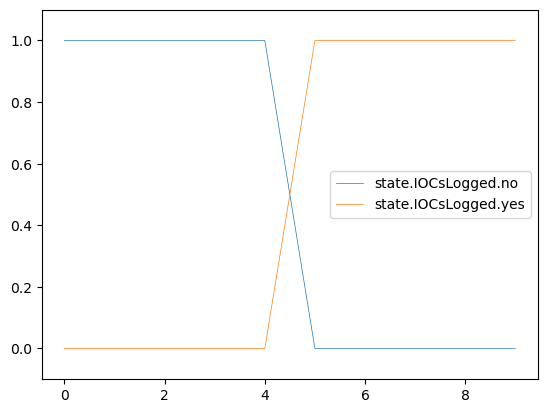

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes    agent_i.action  \
0                    1.0                     0.0  RestrictAccPrivs   
1                    1.0                     0.0      DecoyAccount   
2                    1.0                     0.0      LockAccounts   
3                    1.0                     0.0      LockAccounts   
4                    1.0                     0.0           LogIOCs   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3     PrivEscAcc                        file_enum  
4           Exit                       file_write  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

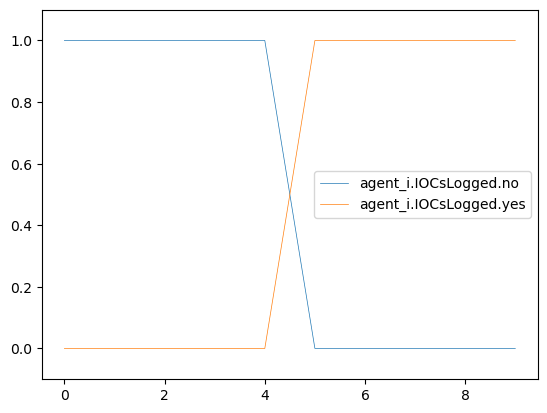

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes agent_j.action  \
0               1.000000                0.000000   EnumAccounts   
1               0.981818                0.018182   EnumAccounts   
2               0.998972                0.001028     PrivEscAcc   
3               0.999951                0.000049     PrivEscAcc   
4               0.999846                0.000154           Exit   
5               0.999846                0.000154            Nop   
6               0.999846                0.000154            Nop   
7               0.999846                0.000154            Nop   
8               0.999846                0.000154            Nop   
9               0.999846                0.000154            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                          denied   
3      LockAccounts                          denied   
4           LogIOCs                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                         none                           failure   
5                   user_files                           success   
6                         none                           success   
7                   user_files                           failure   
8                   user_files                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active               acc_policy_change  
3                          active               acc_policy_change  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

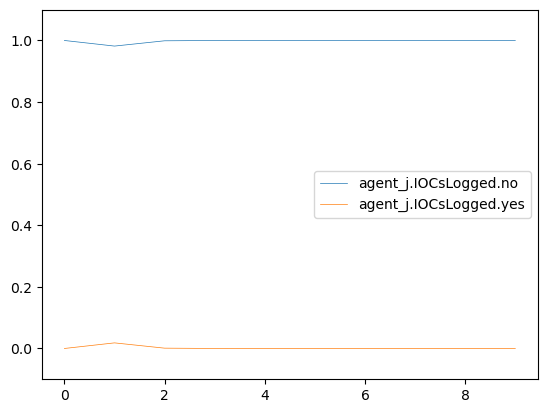

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   1.0                    0.0  RestrictAccPrivs   
1                   1.0                    0.0      DecoyAccount   
2                   0.0                    1.0      LockAccounts   
3                   0.0                    1.0      LockAccounts   
4                   0.0                    1.0           LogIOCs   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2     PrivEscAcc  
3     PrivEscAcc  
4           Exit  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

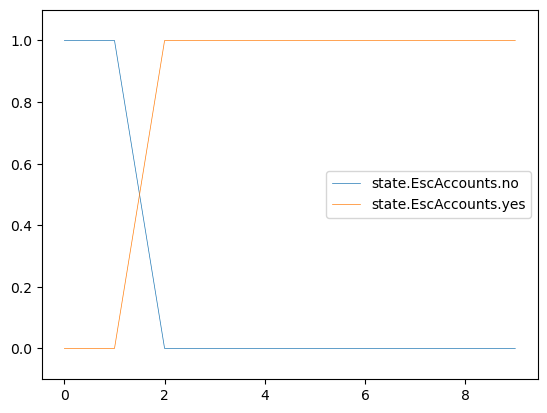

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0  RestrictAccPrivs   
1                     1.0                      0.0      DecoyAccount   
2                     0.0                      1.0      LockAccounts   
3                     0.0                      1.0      LockAccounts   
4                     0.0                      1.0           LogIOCs   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3     PrivEscAcc                        file_enum  
4           Exit                       file_write  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

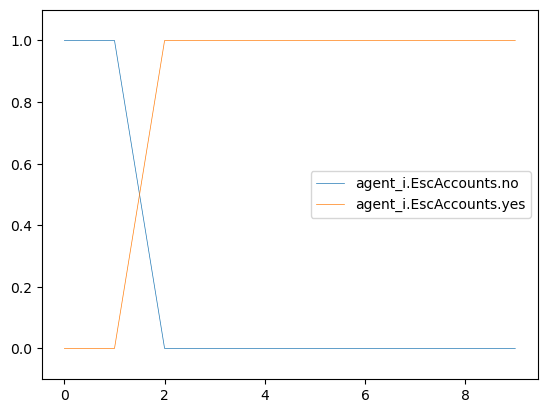

agent_j.EscAccounts.no  agent_j.EscAccounts.yes agent_j.action  \
0                0.500000                 0.500000   EnumAccounts   
1                0.725806                 0.274194   EnumAccounts   
2                0.271739                 0.728261     PrivEscAcc   
3                0.292298                 0.707702     PrivEscAcc   
4                0.917290                 0.082710           Exit   
5                0.917290                 0.082710            Nop   
6                0.917290                 0.082710            Nop   
7                0.917290                 0.082710            Nop   
8                0.917290                 0.082710            Nop   
9                0.917290                 0.082710            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                          denied   
3      LockAccounts                          denied   
4           LogIOCs                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                         none                           failure   
5                   user_files                           success   
6                         none                           success   
7                   user_files                           failure   
8                   user_files                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active               acc_policy_change  
3                          active               acc_policy_change  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

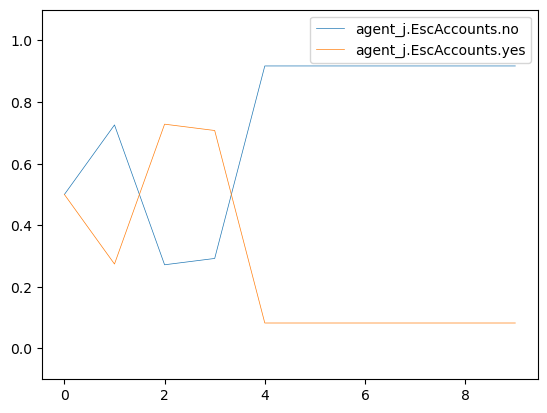

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action agent_j.action  
0                      1.0  RestrictAccPrivs   EnumAccounts  
1                      1.0      DecoyAccount   EnumAccounts  
2                      1.0      LockAccounts     PrivEscAcc  
3                      1.0      LockAccounts     PrivEscAcc  
4                      1.0           LogIOCs           Exit  
5                      1.0               Nop            Nop  
6                      1.0               Nop            Nop  
7                      1.0               Nop            Nop  
8                      1.0               Nop            Nop  
9                      1.0               Nop            Nop

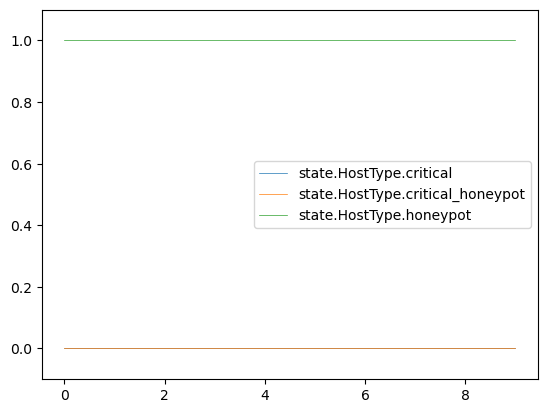

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action agent_j.action  \
0                        1.0  RestrictAccPrivs   EnumAccounts   
1                        1.0      DecoyAccount   EnumAccounts   
2                        1.0      LockAccounts     PrivEscAcc   
3                        1.0      LockAccounts     PrivEscAcc   
4                        1.0           LogIOCs           Exit   
5                        1.0               Nop            Nop   
6                        1.0               Nop            Nop   
7                        1.0               Nop            Nop   
8                        1.0               Nop            Nop   
9                        1.0               Nop            Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                   login_activity  
3                        file_enum  
4                       file_write  
5                             none  
6                       file_write  
7                             none  
8                             none  
9                             none

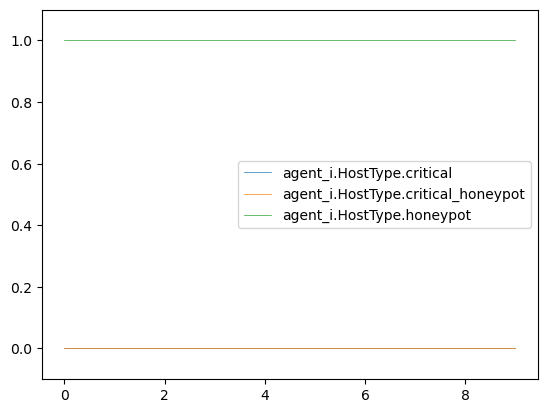

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_j.HostType.honeypot agent_j.action    agent_i.action  \
0                        0.0   EnumAccounts  RestrictAccPrivs   
1                        0.0   EnumAccounts      DecoyAccount   
2                        0.0     PrivEscAcc      LockAccounts   
3                        0.0     PrivEscAcc      LockAccounts   
4                        0.0           Exit           LogIOCs   
5                        0.0            Nop               Nop   
6                        0.0            Nop               Nop   
7                        0.0            Nop               Nop   
8                        0.0            Nop               Nop   
9                        0.0            Nop               Nop   

  agent_j.observation.AccessPerm' agent_j.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                         none   
2                          denied                   user_files   
3                          denied                         none   
4                            auth                         none   
5                          denied                   user_files   
6                            auth                         none   
7                          denied                   user_files   
8                            auth                   user_files   
9                            auth                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnStatus'  \
0                           failure                          active   
1                           success                          active   
2                           failure                          active   
3                           success                          active   
4                           failure                      terminated   
5                           success                      terminated   
6                           success                      terminated   
7                           failure                      terminated   
8                           failure                      terminated   
9                           success                      terminated   

  agent_j.observation.DefenseObs'  
0                    perms_change  
1                            none  
2               acc_policy_change  
3               acc_policy_change  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

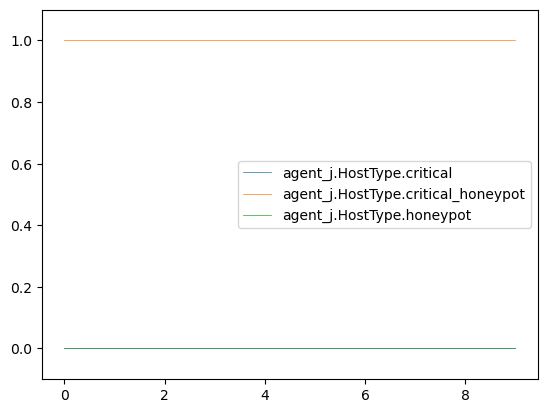

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0  RestrictAccPrivs   
1                     0.0                     1.0      DecoyAccount   
2                     0.0                     1.0      LockAccounts   
3                     0.0                     1.0      LockAccounts   
4                     0.0                     1.0           LogIOCs   
5                     0.0                     1.0               Nop   
6                     0.0                     1.0               Nop   
7                     0.0                     1.0               Nop   
8                     0.0                     1.0               Nop   
9                     0.0                     1.0               Nop   

  agent_j.action  
0   EnumAccounts  
1   EnumAccounts  
2     PrivEscAcc  
3     PrivEscAcc  
4           Exit  
5            Nop  
6            Nop  
7            Nop  
8            Nop  
9            Nop

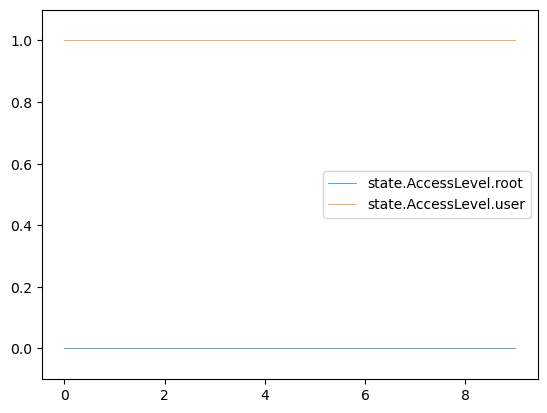

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000  RestrictAccPrivs   
1                  0.000000                  1.000000      DecoyAccount   
2                  0.000000                  1.000000      LockAccounts   
3                  0.000000                  1.000000      LockAccounts   
4                  0.000000                  1.000000           LogIOCs   
5                  0.000000                  1.000000               Nop   
6                  0.280554                  0.719446               Nop   
7                  0.280554                  0.719446               Nop   
8                  0.052769                  0.947231               Nop   
9                  0.036619                  0.963381               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3     PrivEscAcc                        file_enum  
4           Exit                       file_write  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

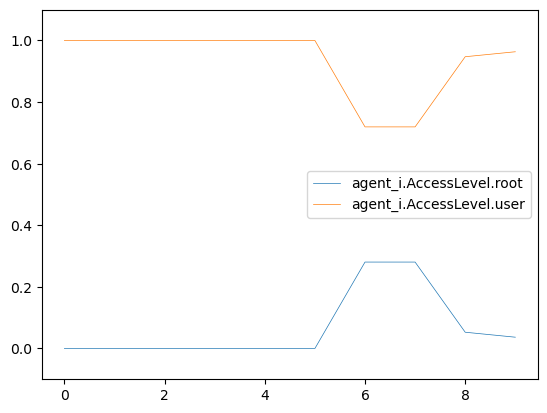

agent_j.AccessLevel.root  agent_j.AccessLevel.user agent_j.action  \
0                       0.0                       1.0   EnumAccounts   
1                       0.0                       1.0   EnumAccounts   
2                       0.0                       1.0     PrivEscAcc   
3                       0.0                       1.0     PrivEscAcc   
4                       0.0                       1.0           Exit   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0            Nop   
7                       0.0                       1.0            Nop   
8                       0.0                       1.0            Nop   
9                       0.0                       1.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                          denied   
3      LockAccounts                          denied   
4           LogIOCs                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                         none                           failure   
5                   user_files                           success   
6                         none                           success   
7                   user_files                           failure   
8                   user_files                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active               acc_policy_change  
3                          active               acc_policy_change  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

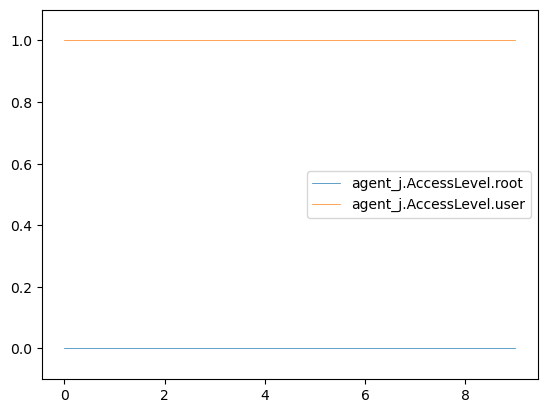

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action agent_j.action
0                 0.0                  1.0  RestrictAccPrivs   EnumAccounts
1                 0.0                  1.0      DecoyAccount   EnumAccounts
2                 0.0                  1.0      LockAccounts     PrivEscAcc
3                 0.0                  1.0      LockAccounts     PrivEscAcc
4                 0.0                  1.0           LogIOCs           Exit
5                 1.0                  0.0               Nop            Nop
6                 1.0                  0.0               Nop            Nop
7                 1.0                  0.0               Nop            Nop
8                 1.0                  0.0               Nop            Nop
9                 1.0                  0.0               Nop            Nop

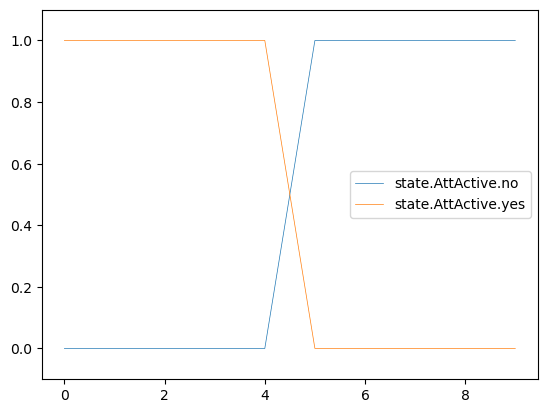

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.000000               1.000000  RestrictAccPrivs   
1              0.000000               1.000000      DecoyAccount   
2              0.016212               0.983788      LockAccounts   
3              0.081543               0.918457      LockAccounts   
4              0.128329               0.871671           LogIOCs   
5              0.176067               0.823932               Nop   
6              0.719004               0.280996               Nop   
7              0.719446               0.280554               Nop   
8              0.947231               0.052769               Nop   
9              0.997158               0.002842               Nop   

  agent_j.action agent_i.observation.EndPtAlerts'  
0   EnumAccounts                        file_enum  
1   EnumAccounts                        file_enum  
2     PrivEscAcc                   login_activity  
3     PrivEscAcc                        file_enum  
4           Exit                       file_write  
5            Nop                             none  
6            Nop                       file_write  
7            Nop                             none  
8            Nop                             none  
9            Nop                             none

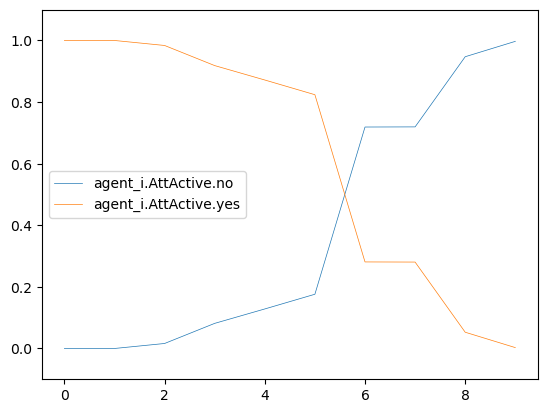

agent_j.AttActive.no  agent_j.AttActive.yes agent_j.action  \
0                   0.0                    1.0   EnumAccounts   
1                   0.0                    1.0   EnumAccounts   
2                   0.0                    1.0     PrivEscAcc   
3                   0.0                    1.0     PrivEscAcc   
4                   0.0                    1.0           Exit   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0            Nop   
7                   1.0                    0.0            Nop   
8                   1.0                    0.0            Nop   
9                   1.0                    0.0            Nop   

     agent_i.action agent_j.observation.AccessPerm'  \
0  RestrictAccPrivs                          denied   
1      DecoyAccount                          denied   
2      LockAccounts                          denied   
3      LockAccounts                          denied   
4           LogIOCs                            auth   
5               Nop                          denied   
6               Nop                            auth   
7               Nop                          denied   
8               Nop                            auth   
9               Nop                            auth   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                   user_files                           failure   
3                         none                           success   
4                         none                           failure   
5                   user_files                           success   
6                         none                           success   
7                   user_files                           failure   
8                   user_files                           failure   
9                         none                           success   

  agent_j.observation.ConnStatus' agent_j.observation.DefenseObs'  
0                          active                    perms_change  
1                          active                            none  
2                          active               acc_policy_change  
3                          active               acc_policy_change  
4                      terminated                            none  
5                      terminated                            none  
6                      terminated                            none  
7                      terminated                            none  
8                      terminated                            none  
9                      terminated                            none

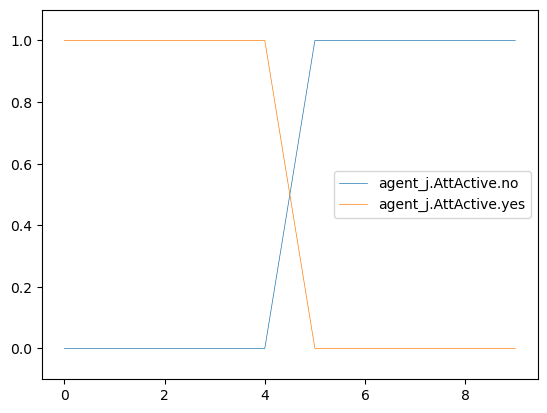

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)

    